<a href="https://www.kaggle.com/code/zarna99/eda-ds-salaries?scriptVersionId=105340793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5B2C6F  ;
           font-size:250%;
           font-family:Sans-serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;
               text-align:center">
    <b>
        This notebook contain exploratory data analysis
        </b>
</p>
</div></h1>


### Table of Contents

* [1. Descriptive](#1)
    * [1.1 Installing and Importing Libraries](#1.1)
    * [1.2 Importing the Dataset](#1.2)
    * [1.3 About the Dataset](#1.3)
    * [1.4 Understanding the Dataset](#1.4)
    * [1.5 Data Preprocessing](#1.5)
        * [1.5.1 Converting Country Codes](#1.5.1)
        * [1.5.2 Removing Irrelevant Features](#1.5.2)
        * [1.5.3 Seeing the Unique Values](#1.5.3)
        * [1.5.4 Changing the Datatypes of Variables](#1.5.4)
        * [1.5.5 Renaming the Categorical Variables](#1.5.5)
        * [1.5.6 Working on Duplicate Entries](#1.5.6)
        * [1.5.7 Dataset After the Preprocessing](#1.5.7)
        
    * [1.6 Generating EDA Report](#1.6)
        
* [2. Visualization](#2)
    * [2.1 Defining Functions](#2.1)
    * [2.2 Univariate](#2.2)
    * [2.3 Bivariate](#2.3)
         * [2.3.1 Comparing All the Features with Salary](#2.3.1)
        
             * [2.3.1.1 Job Title and Salary](#2.3.1.1)
             * [2.3.1.2 Employee Residence and Salary](#2.3.1.2)
             * [2.3.1.3 Company Size and Salary](#2.3.1.3)
             * [2.3.1.4 Company Location and Salary](#2.3.1.4)
             * [2.3.1.5 Experience Level and Salary](#2.3.1.5)
             * [2.3.1.6 Employment Type and Salary](#2.3.1.6)
             * [2.3.1.7 Remote Ratio and Salary](#2.3.1.7)
               
         * [2.3.2 Categorical Comparison](#2.3.2)
         
             * [2.3.2.1 Employment type and Remote Ratio](#2.3.2.1)
             * [2.3.2.2 Employment type and Experience Level](#2.3.2.2)
             * [2.3.2.3 Experience Level and Remote Ratio](#2.3.2.3)
             * [2.3.2.4 Experience Level and Company Size](#2.3.2.4)
             * [2.3.2.5 Employment type and Company Size](#2.3.2.5)
             * [2.3.2.6 Remote Ratio and Company Size](#2.3.2.6)
             
    * [2.4 Multivariate](#2.4)
        * [2.4.1 Salary v/s Experience Level v/s Remote Ratio](#2.4.1)
        * [2.4.2 Salary v/s Job Title v/s Remote Ratio](#2.4.2)
        * [2.4.3 Salary v/s Job Title v/s Company Size](#2.4.3)
        * [2.4.4 Salary v/s Job Title v/s Experience Level](#2.4.4)
        * [2.4.5 Salary v/s Employment type v/s Experience Level](#2.4.5)
        * [2.4.6 Salary v/s Employment type v/s Remote Ratio](#2.4.6)

<h2><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#D7BDE2;
           font-size:200%;
           font-family:Sans-serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>
        Descriptive<a class="anchor" id="1"></a>
    </b>
</p>
</div></h2>

<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
        <b>We shall first start with installing and importing the necessary libraries.<a class="anchor" id="1.1"></a></b>
    </p>
</div></h3>

In [1]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 67.7 MB/s eta 0:00:00


In [2]:
pip install country-converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for country-converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=e56330bfb9b7ef3860398d59f647796fbcfd3b9bc93482c91afe305d5937b8b6
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country-converter
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sweetviz as sv
import country_converter as coco
from seaborn.rcmod import palettes

%matplotlib inline

<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>Importing the dataset.<a class="anchor" id="1.2"></a></b>
 </p>
</div></h3>

In [4]:
df = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv",index_col=0)
df

work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE             0   
1    260000             USD         260000                 JP             0   
2     85000             GBP         109024                 GB            50   
3     20000             USD          20000                 HN             0   
4    150000             USD         150000                 US            50   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US           100   
603  126000             USD         126000                 US           100   
604  129000             USD         129000                 US             0   
605  150000             USD         150000                 US           100   
606  200000             USD         200000                 IN           100   

    company_location company_size  
0                 DE            L  
1                 JP            S  
2                 GB            M  
3                 HN            S  
4                 US            L  
..               ...          ...  
602               US            M  
603               US            M  
604               US            M  
605               US            M  
606               US            L  

[607 rows x 11 columns]

<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>About the dataset<a class="anchor" id="1.3"></a></b>
    </p>
</div></h3>
    






1.   work_year :	The year the salary was paid.
2.   experience_level :	The experience level in the job during the year with the following possible values:

> *   EN (Entry-level) / Junior
*   MI (Mid-level) / Intermediate
*   SE (Senior-level) / Expert
*   EX (Expert-level) / Director

3.   employment_type : The type of employement for the role: 

> *   PT : Part-time
*   FT : Full-time
*   CT : Contract
*   FL : Freelance

4.   job_title : The role worked in during the year.
5.   salary	: The total gross salary amount paid.
6.   salary_currency : The currency of the salary paid as an ISO 4217 currency code.
7.   salary_in_usd : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
8.   employee_residence	: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9.   remote_ratio	: The overall amount of work done remotely, possible values are as follows: 

> *   0 : No remote work (less than 20%)
*   50 : Partially remote
*   100 : Fully remote (more than 80%)

10.   company_location :	The country of the employer's main office or contracting branch as an ISO 3166 country code.
11.   company_size : The average number of people that worked for the company during the year: 
  
> *   S : less than 50 employees (small)
*   M : 50 to 250 employees (medium)
*   L : more than 250 employees (large)


<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>Understanding the dataset<a class="anchor" id="1.4"></a></b>
    </p>
</div></h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


The dataset contains salary information of the Data science and its related jobs. It has 607 entries and 11 features. 

Looking at the basic information it is clear that there are no missing values in the dataset.

<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>Data Preprocessing<a class="anchor" id="1.5"></a></b>
    </p>
</div></h3>

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>Converting Country codes into their respective names<a class="anchor" id="1.5.1"></a></b></p></h4>



Here the company_location and employee_residence are mentioned in terms of country codes as per ISO 3166 Country code. For better understanding and visualization we shall convert this codes to their respective country names.

In [6]:
df['Company_Location'] = df.company_location.apply(lambda x : coco.convert(names=x, to='name_short', not_found=None))

In [7]:
df['Employee_Residence'] = df.employee_residence.apply(lambda x : coco.convert(names=x, to='name_short', not_found=None))

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>Deleting the irrelevant features<a class="anchor" id="1.5.2"></a></b></p></h4>

We shall continue our analysis on salary in USD only.
Hence we shall remove the Salary and Salary currency columns.

Also we have converted the country codes into their respective country names and created new columns. Hence we shall also delete the columns that contain the country codes.

In [8]:
df.drop(['salary','salary_currency', 'company_location', 'employee_residence'], axis=1, inplace=True)

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>We shall now see what are the unique values of all the categorical variables.<a class="anchor" id="1.5.3"></a></b></p></h4>

In [9]:
columns = ['work_year', 'experience_level','employment_type','job_title','Employee_Residence','Company_Location','company_size','remote_ratio']

uniques = {col: df[col].unique() for col in columns}
uniques

{'work_year': array([2020, 2021, 2022]),
 'experience_level': array(['MI', 'SE', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'PT', 'FL'], dtype=object),
 'job_title': array(['Data Scientist', 'Machine Learning Scientist',
        'Big Data Engineer', 'Product Data Analyst',
        'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
        'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
        'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
        'Director of Data Science', 'Research Scientist',
        'Machine Learning Manager', 'Data Engineering Manager',
        'Machine Learning Infrastructure Engineer', 'ML Engineer',
        'AI Scientist', 'Computer Vision Engineer',
        'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
        '3D Computer Vision Researcher', 'Data Analytics Engineer',
        'Applied Data Scientist', 'Marketing Data Analyst',
        'Cloud Data Engineer', 'Fi

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>Changing the datatype of the variables<a class="anchor" id="1.5.4"></a></b></p></h4>

Here, seeing to the unique values it is clear that the work year and remote ratio are not of int64 datatype. we shall convert these into object datatype.

In [10]:
df["work_year"] = df["work_year"].astype('object')
df["remote_ratio"] = df["remote_ratio"].astype('object')

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>For better interpretation and understanding we shall rename the values of the categorical variables.<a class="anchor" id="1.5.5"></a></b></p></h4>

In [11]:
df.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)
df.employment_type.replace(['FT','CT','PT', 'FL'], ['Full Time', 'Contract', 'Part Time', 'Freelance'], inplace = True)
df.company_size.replace(['L','S','M'], ['Large', 'Small', 'Medium'], inplace = True)

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>Checking for any duplicate entries.<a class="anchor" id="1.5.6"></a></b></p></h4>

In [12]:
df[df.duplicated()].shape

(42, 9)

There are 42 duplicate entries in the data. Hence the next step will be removing these values.

In [13]:
df_cleaned1 = df.drop_duplicates()
df_cleaned1

work_year experience_level employment_type                   job_title  \
0        2020              Mid       Full Time              Data Scientist   
1        2020           Senior       Full Time  Machine Learning Scientist   
2        2020           Senior       Full Time           Big Data Engineer   
3        2020              Mid       Full Time        Product Data Analyst   
4        2020           Senior       Full Time   Machine Learning Engineer   
..        ...              ...             ...                         ...   
602      2022           Senior       Full Time               Data Engineer   
603      2022           Senior       Full Time               Data Engineer   
604      2022           Senior       Full Time                Data Analyst   
605      2022           Senior       Full Time                Data Analyst   
606      2022              Mid       Full Time                AI Scientist   

     salary_in_usd remote_ratio company_size Company_Location  \
0            79833            0        Large          Germany   
1           260000            0        Small            Japan   
2           109024           50       Medium   United Kingdom   
3            20000            0        Small         Honduras   
4           150000           50        Large    United States   
..             ...          ...          ...              ...   
602         154000          100       Medium    United States   
603         126000          100       Medium    United States   
604         129000            0       Medium    United States   
605         150000          100       Medium    United States   
606         200000          100        Large    United States   

    Employee_Residence  
0              Germany  
1                Japan  
2       United Kingdom  
3             Honduras  
4        United States  
..                 ...  
602      United States  
603      United States  
604      United States  
605      United States  
606              India  

[565 rows x 9 columns]

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>Dataset after the preprocessing<a class="anchor" id="1.5.7"></a></b></p></h4>

After all the preprocessing, the data has 8 features and 565 entries. Out of these features, only one feature i.e. salary_in_usd is of int64 datatype and rest all are categorical in nature.

In [14]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    object
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   remote_ratio        565 non-null    object
 6   company_size        565 non-null    object
 7   Company_Location    565 non-null    object
 8   Employee_Residence  565 non-null    object
dtypes: int64(1), object(8)
memory usage: 44.1+ KB


<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>Generating EDA report using Sweetviz<a class="anchor" id="1.6"></a></b>
    </p>
</div></h3>

In [15]:
sweet_report = sv.analyze(df_cleaned1)
#sweet_report.show_html('DS_Salary.html')

                                             |          | [  0%]   00:00 -> (? left)


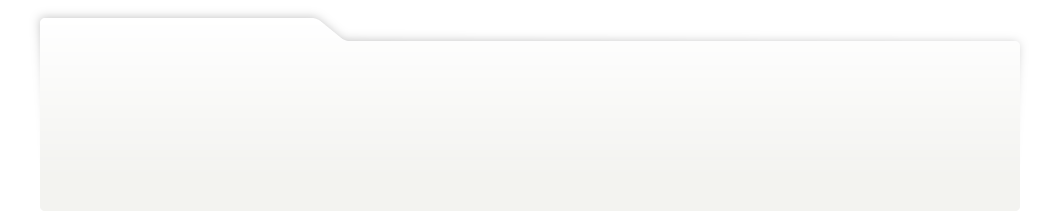
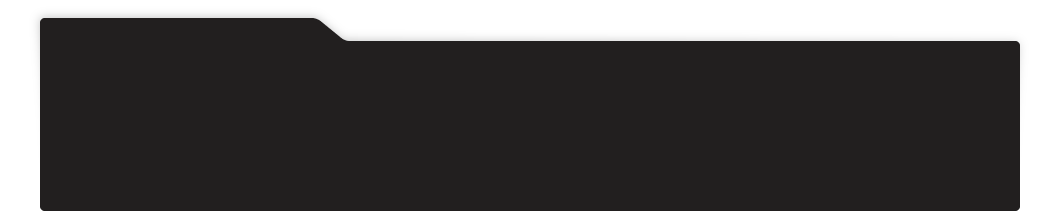
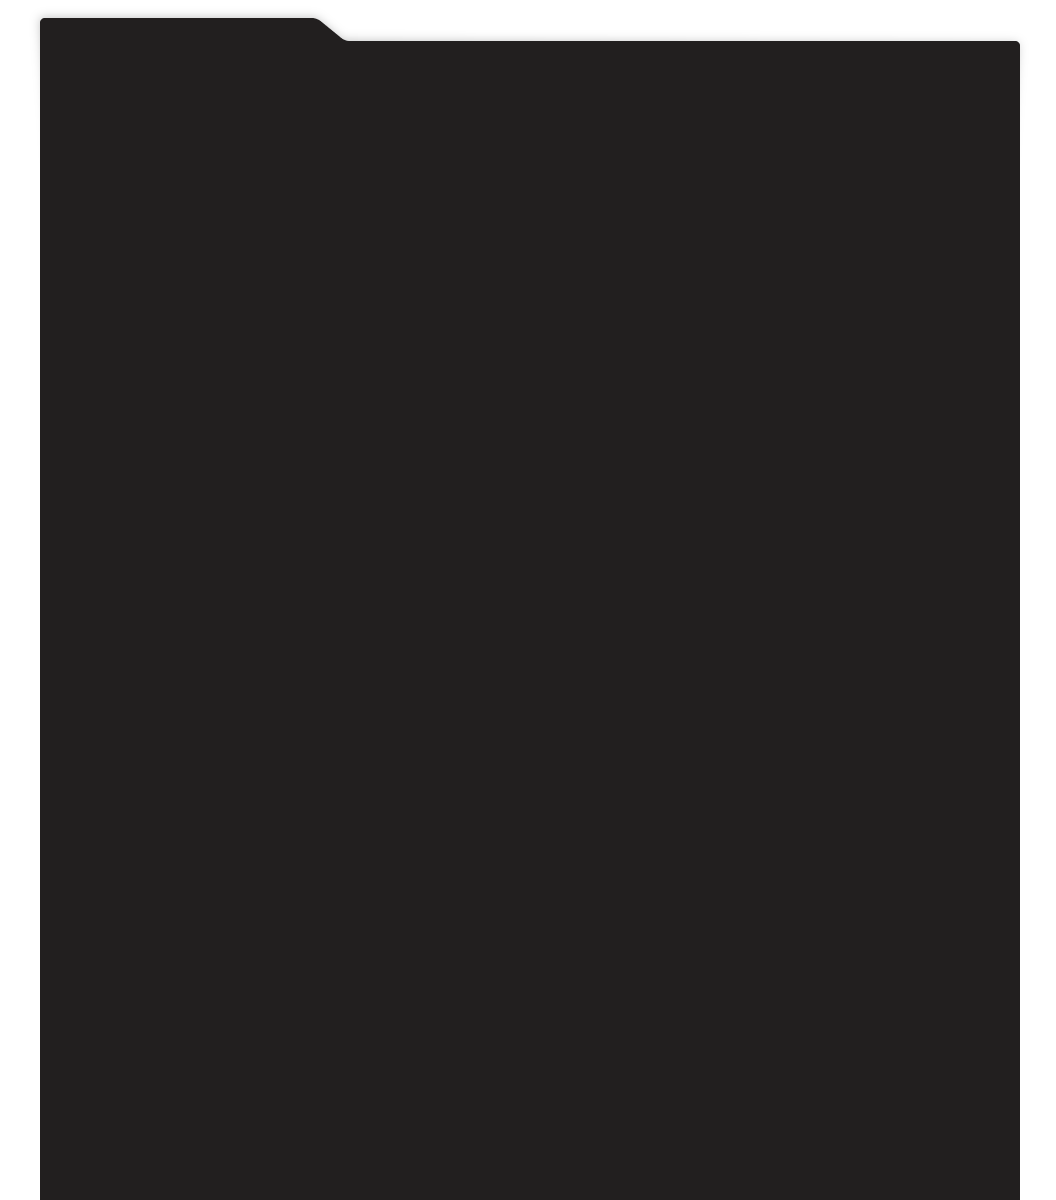
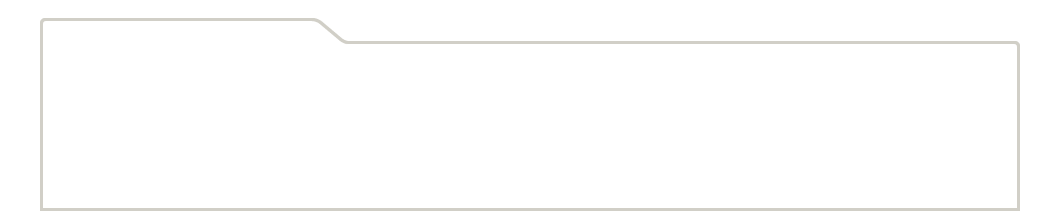
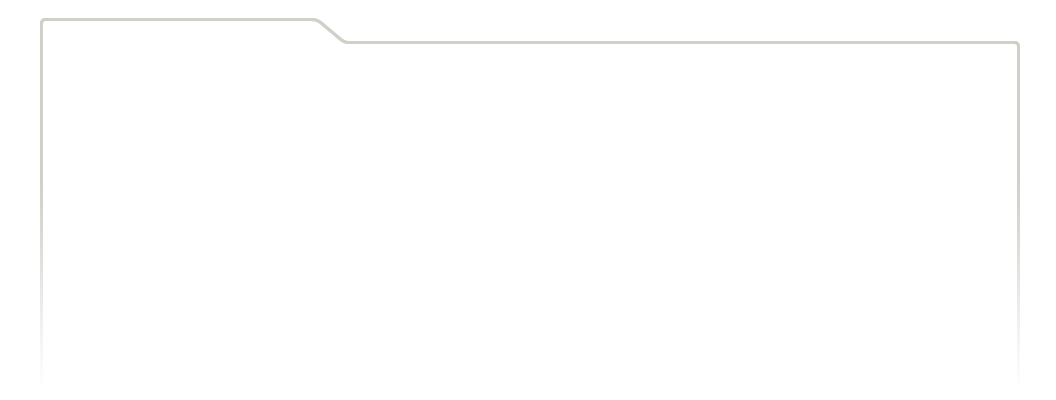
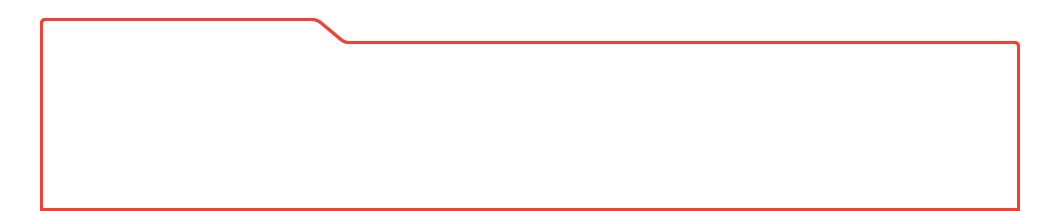
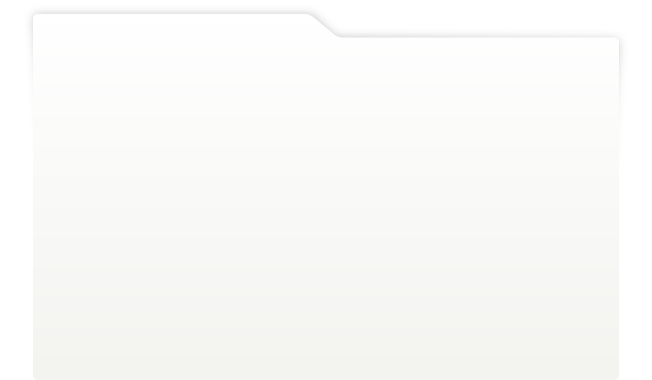
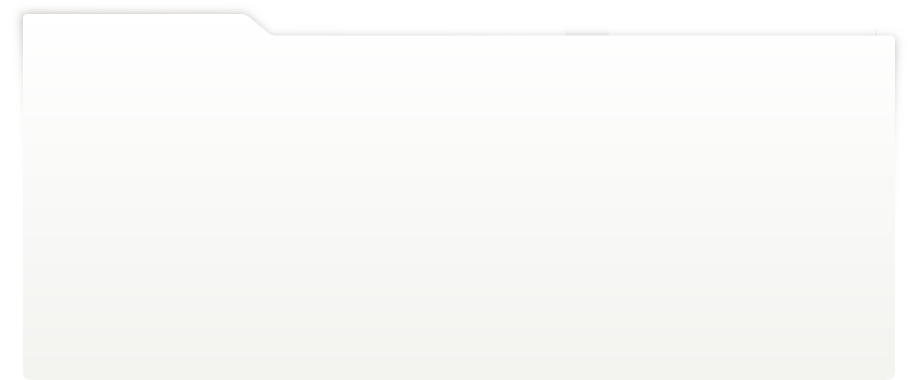
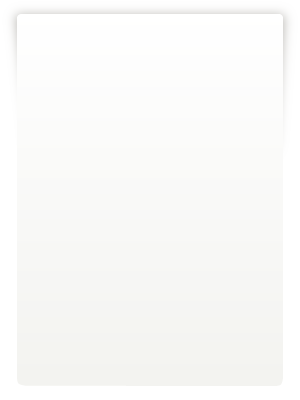
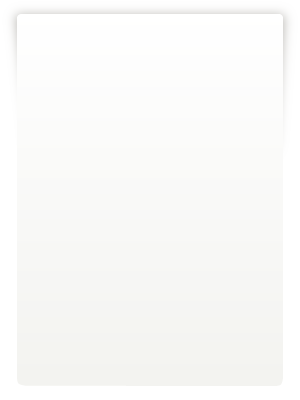
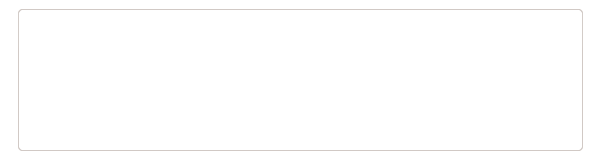
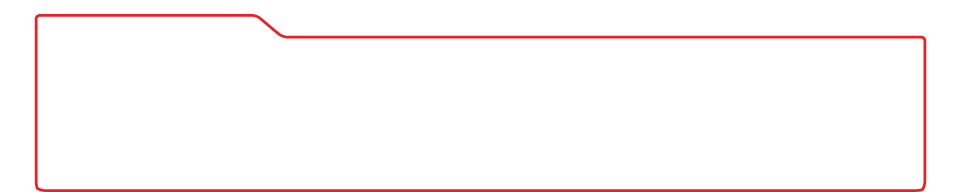
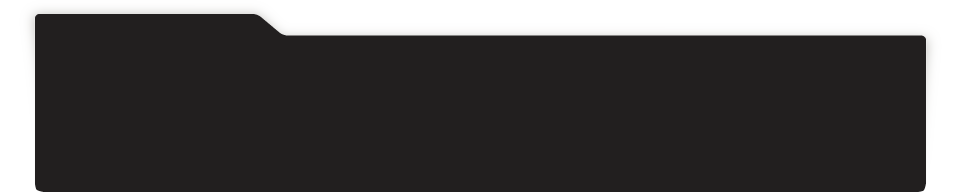
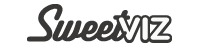
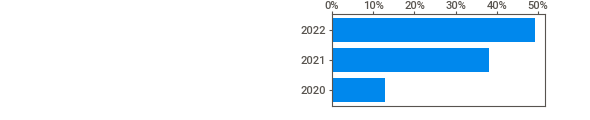
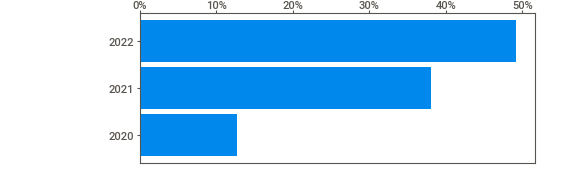
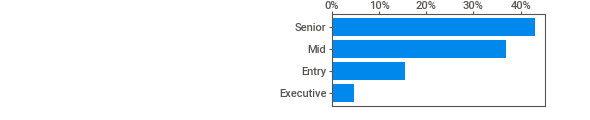
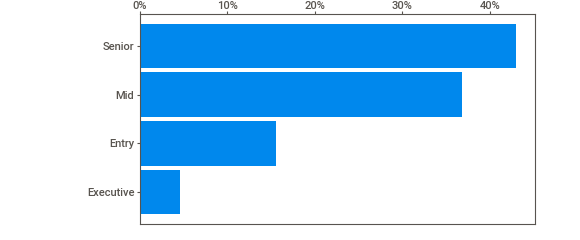
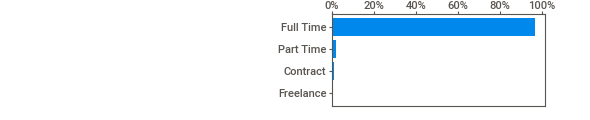
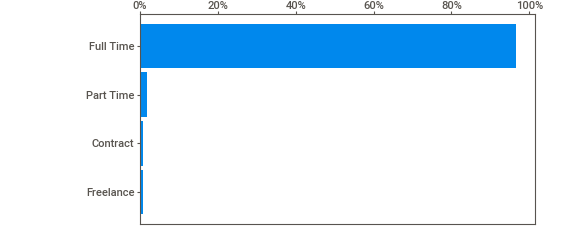
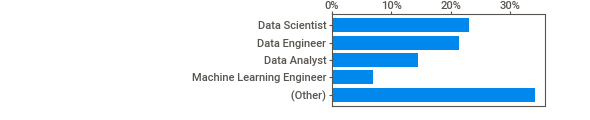
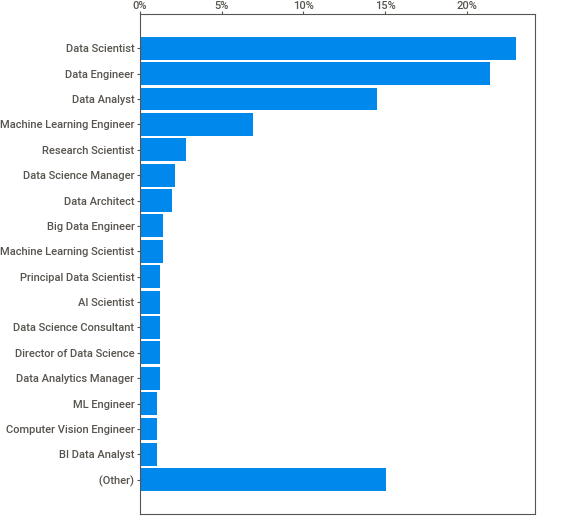
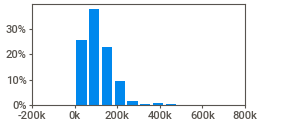
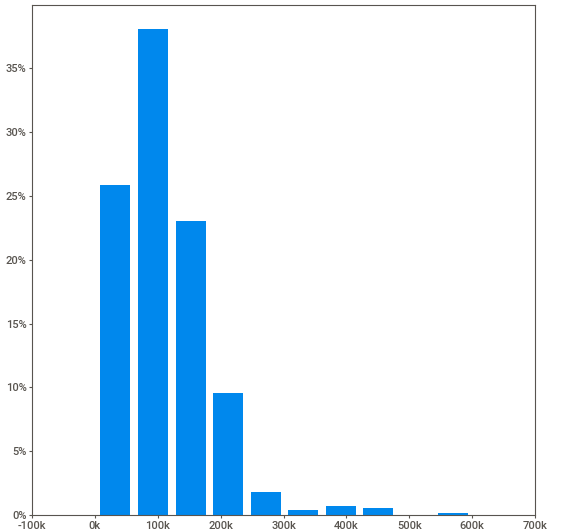
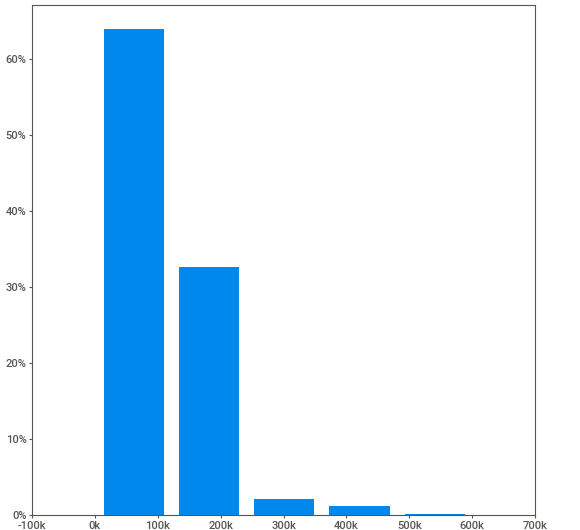
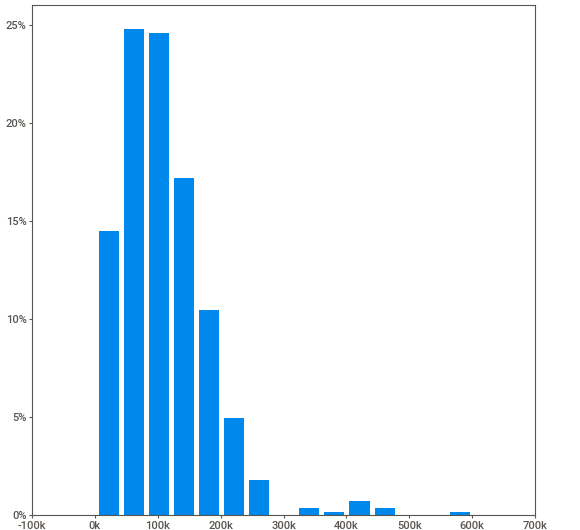
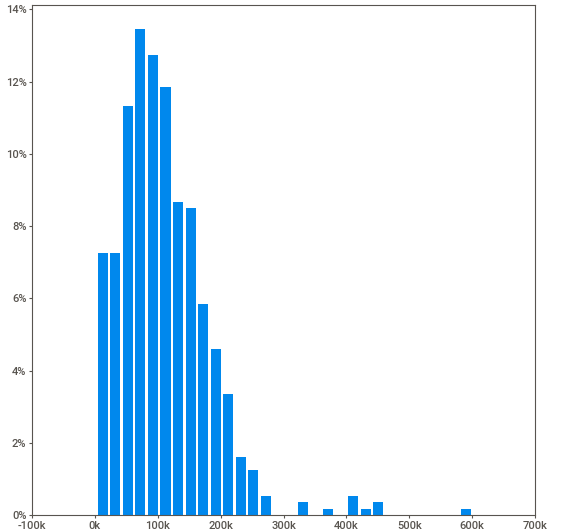
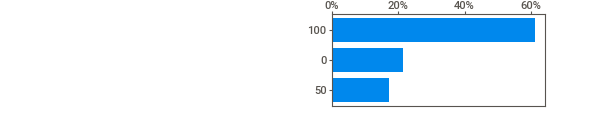
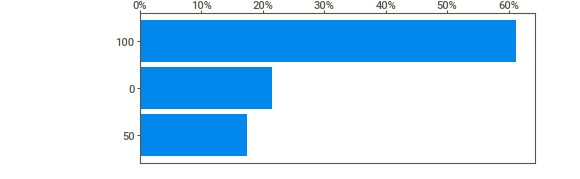
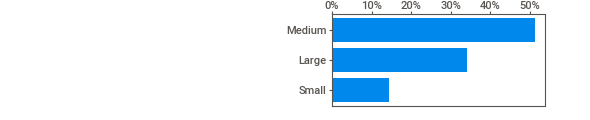
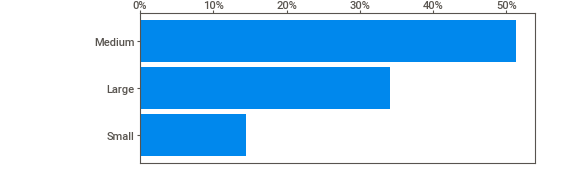
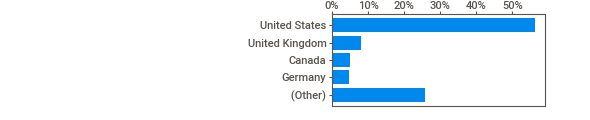
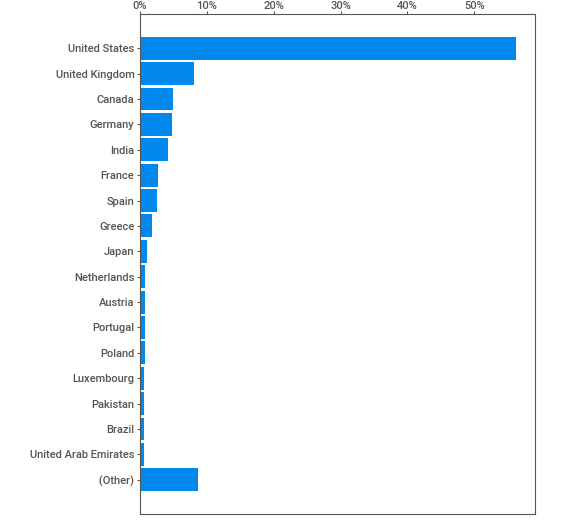
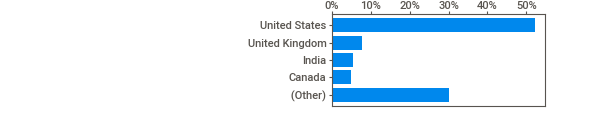
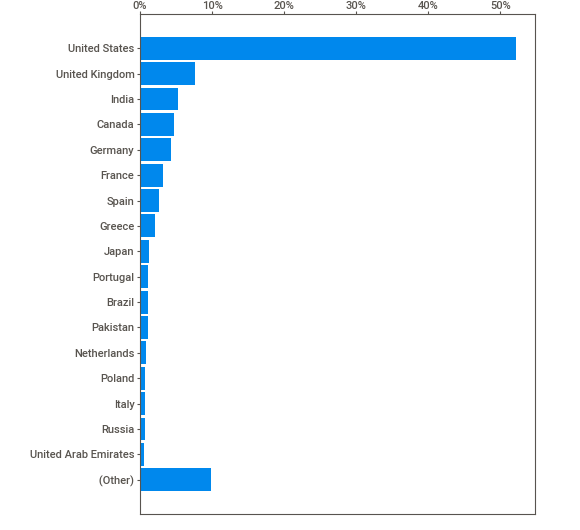
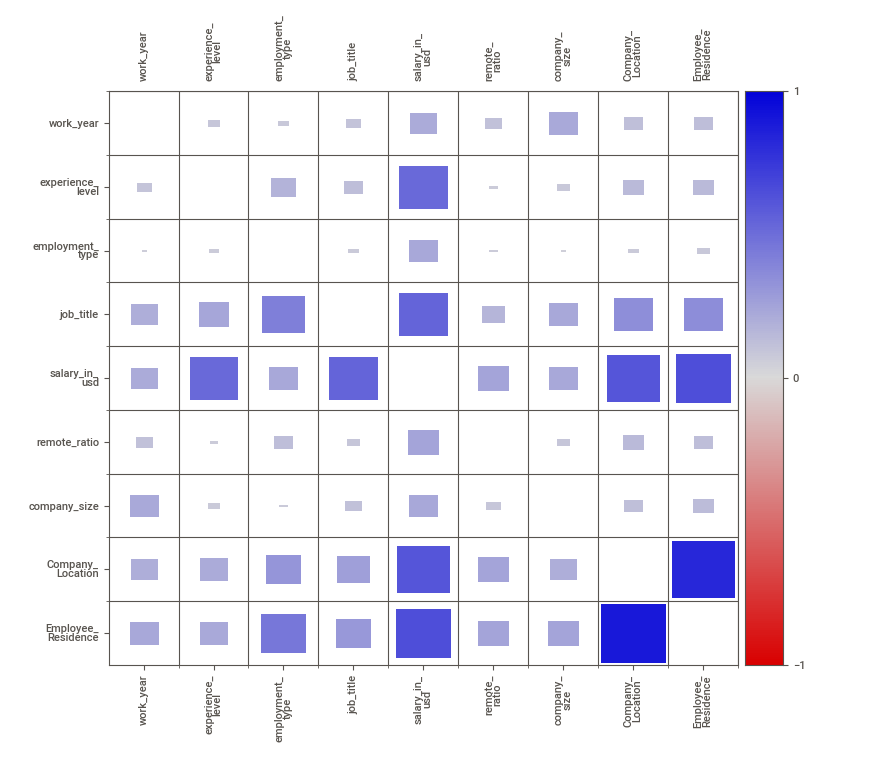
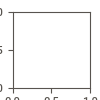

In [16]:
sweet_report.show_notebook(layout='widescreen', w=1500, h=600, scale=0.8)

### Inferences from the EDA report

---



---



### We can get following inferences looking at the EDA report :

---
### Univariate Analysis

1.   Work_Year : 
> Majority of the data is taken for the year 2022, followed by 2021 and 2020
2.   experience_level :
> The maximum data taken here is of the personnels who are working at senior level followed by Middle level and Entry level. The personnels with executive level contributes minimum in the dataset.
3.   employment_type :
> The maximum data here belongs to the personnels who are working on full time basis.
4.   job_title :
> The top three categories of job type in the dataset is of Data Scientist, Data Engineer and Data Analyst. Apart from this there are 47 other type of job titles covered in this dataset.
5.   Salary_in_usd : 
> The salary ranges from 2859 USD to 600000 USD, Average salary approximately being 111000 USD. 
6.   employee_residence : 
> The personnels from US contributes maximum in the dataset followed by Great Britain.
7.   remote_ratio
> The personnels who have contributed maximum in the dataset are the ones who are performing their job remotely followed by the ones who are working remotely partially.
8.   company_location : 
> The maximum personnels in this dataset are working in the offices that are located in US.
9. company_size :
> The maximum data in the dataset are of the ones who are working in the medium size companies.

---
### Bivariate Analysis
*   The top 4 categorical association of salary_in_usd is with Employee Resisdence, Company Location, Job Title and Experience Level.






<h2><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#D7BDE2;
           font-size:300%;
           font-family:Sans-serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
               text-align:center">
    <b>
        Visualization<a class="anchor" id="2"></a>
    </b>
</p>
</div></h2>

<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>Defining Functions<a class="anchor" id="2.1"></a></b>
    </p>
</div></h3>

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>Description</b></p></h4>

1.   freq_plot

  freq_plot will show the frequency for each categories in the dataset and will plot it using bars. It has two parameters "type" and "y".
*   type
> Parameter "type" can take either "1" or "2" as its value. The type=1 will show the plot for the variables where the number of categories are more than 5, and if it is less than 5 than the plots will be shown by passing type=2.
*   y
> Name of the variable for which graph is to be shown.



2.   ASF_plot

  ASF_plot will plot Average Salary against each category of the variable specified. It will show values in terms of average salary. It has 4 parameters out of which 2 are optional.


*   type
> Parameter "type" can take either "1" or "2" as its value. The type=1 will show the plot for the variables where the number of categories are more than 5, and if it is less than 5 than the plots will be shown by passing type=2.

*   y
> Name of the variable for which graph is to be shown.


*   order (optional)
> This parameter will arrange the plot according to the values of average salary. It can take either "0" or "1" as its value. by default the value is 0. Hence if no value is passed for this parameter it will plot the bars and arrange it according to the frequency of the categories. If order=1, then it will plot the bars and arrange it according to the values of Average Salary for each categories and order it descending manner, showing the category having highest salary at the top.



*   Top (optional)
> This parameter will show the n categories having highest salaries. By default the value of Top is 0. Hence if no arguments are passed for this parameter then it will show all the categories, otherwise it will show only those number of categories, which the value is passed. Thus if Top=10, then it will show Top 10 categories paying highest salaries. 



3.   Multi_plot
This plot will create a multiple bar chart, plotted against the average salary. It will show values in terms of average salary. It has 3 parameters out of which one is optional.


*   x
> Name of the variable to be plotted.

*   y
> Name of the variable for which the bars are to be grouped (hue).

*   Type (optional)
> It can take either "0" or "1" as its value. By default the value is 0. If the value of x has a variable that has more than 5 categories, than the value of Type should be passed as 1, and it will plot the bars only for the top 5 categories having the highest frequency.






4.   categ_plot
This plot will show a barplot having both x-axis and y-axis data as categorical.
It will show the values in percentage. It has two parameters.


*   x
> Name of a categorical variable.
*   y
> Name of a categorical variable.








 

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>Function</b></p></h4>

In [17]:
def freq_plot(type,y):
  '''will show the frequency for each categories in the dataset and will plot it using bars
  *   type = 1 : if categories in a variable is more than 5
           = 2 : if categories in a variable is less than 5

  *   y = Name of the variable for which graph is to be shown.'''
  if type==1:
    plt.figure(figsize=(17,11))    
    ax = sns.countplot(y=y, data=df_cleaned1, palette="Set2", order=df_cleaned1[y].value_counts().sort_values(ascending = False).index)
    plt.title(label=f'{y} and their Frequency', size=15)
    total=len(df_cleaned1[y])
    for p in ax.patches:
        ax.annotate('({:.1f}%)'.format(100*p.get_width()/total),((p.get_x() + p.get_width()), p.get_y()), xytext=(17, -7),
                    fontsize=8,color='black',textcoords='offset points', horizontalalignment='center')
        ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(-1, -7.55),
                    fontsize=8,color='black',textcoords='offset points', horizontalalignment='right')
    plt.show()

  if type==2 :
    plt.figure(figsize=(8,5))    
    ax = sns.countplot(y=y, data=df_cleaned1, palette="Set2", order=df_cleaned1[y].value_counts().sort_values(ascending = False).index)
    plt.title(label=f'{y} and their Frequency', size=15)
    total=len(df_cleaned1[y])
    for p in ax.patches:
        ax.annotate('({:.1f}%)'.format(100*p.get_width()/total),((p.get_x() + p.get_width()), p.get_y()), xytext=(22, -45),
                    fontsize=10,color='black',textcoords='offset points', horizontalalignment='center')
        ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(22, -25),
                    fontsize=10,color='black',textcoords='offset points', horizontalalignment='center')
    plt.show

In [18]:
def ASF_plot(type,y,order=0,Top=0):
  '''will plot Average Salary against each category of the variable specified
  *   type = 1 : if categories in a variable is more than 5
           = 2 : if categories in a variable is less than 5
       
  *   y = Name of the variable for which graph is to be shown

  *   order (optional)
        0 = arrange the bars according to the frequency of the categories (default)
        1 = arrange the according to the values of Average Salary for each categories in descending order

  *   Top (optional)
       (any value between 0 and the number of categories of the variable)
        0 = Plots all the categories (default) '''
  if type==1:
      if order==0:
          g = sns.catplot(y=y, x="salary_in_usd", kind="bar", data=df_cleaned1, height = 9, palette="muted", 
                          order=df_cleaned1[y].value_counts().sort_values(ascending = False).index,
                aspect=10/8, orient="horizontal", ci=None)
          plt.title(label=f"Average Salary for each {y} arranged according to their frequency in the dataset", size=15)
          ax = g.facet_axis(0,0)
          for p in ax.patches:
            ax.text(p.get_x() + p.get_width(),p.get_y(),  
                "%.2f" % p.get_width(), 
                color='black', rotation='horizontal', fontsize=8, horizontalalignment="left", verticalalignment="top", bbox=dict(boxstyle="round", fc="w"))
          plt.show()
      else:
        if Top==0:
            data = pd.DataFrame(df_cleaned1.groupby(y)['salary_in_usd'].mean().sort_values(ascending = False))
            data.reset_index(inplace=True)
            g = sns.catplot(x="salary_in_usd", y=y, kind="bar", data=data, height = 9, aspect=10/8, palette="flare")
            plt.title(label=f"Average Salary for each {y}", size=15)
            ax = g.facet_axis(0,0)
            for p in ax.patches:
              ax.text(p.get_x() + p.get_width(),p.get_y(),  
                "%.2f" % p.get_width(), 
                color='black', rotation='horizontal', fontsize=8, horizontalalignment="left", verticalalignment="top", bbox=dict(boxstyle="round", fc="w"))
            plt.show()
        else:
            data = pd.DataFrame(df_cleaned1.groupby(y)['salary_in_usd'].mean().sort_values(ascending = False))
            data.reset_index(inplace=True)
            g = sns.catplot(x="salary_in_usd", y=y, kind="bar", data=data.head(Top), height = 6, aspect=10/6, palette="flare")
            plt.title(label=f"Top {Top} Highest Paying {y}", size=15)
            ax = g.facet_axis(0,0)
            for p in ax.patches:
              ax.text(p.get_x() + p.get_width(),p.get_y()*1.01,  
                "%.2f" % p.get_width(), 
                color='black', rotation='horizontal', fontsize=8, horizontalalignment="left", verticalalignment="top", bbox=dict(boxstyle="round", fc="w"))
            plt.show()


  else:
      if order==0:
          g = sns.catplot(x=y, y="salary_in_usd", kind="bar", data=df_cleaned1, height = 5, palette="muted", 
                          order=df_cleaned1[y].value_counts().sort_values(ascending = False).index,
              aspect=7/5, ci=None)
          plt.title(label=f"Average Salary for each {y} arranged according to their frequency in the dataset", size=15)
          ax = g.facet_axis(0,0)
          for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2 ,p.get_height() * 1.03,  
                "%.2f" % p.get_height(),
                color='black', rotation='horizontal', fontsize=10, horizontalalignment="center", verticalalignment="center", 
                    bbox=dict(boxstyle="round", fc="w"))
          plt.show()
      else:
          data = pd.DataFrame(df_cleaned1.groupby(y)['salary_in_usd'].mean().sort_values(ascending = False))
          data.reset_index(inplace=True)
          g = sns.catplot(y="salary_in_usd", x=y, kind="bar", data=data, height = 5, aspect=8/5, palette="crest")
          plt.title(label=f"Average Salary for each {y}", size=15)
          ax = g.facet_axis(0,0)
          for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2 ,p.get_height() * 1.03,  
                "%.2f" % p.get_height(),
                color='black', rotation='horizontal', fontsize=10, horizontalalignment="center", verticalalignment="center", 
                    bbox=dict(boxstyle="round", fc="w"))
          plt.show()

In [19]:
def Multi_plot(x,y,type=0):
  '''will create a multiple bar chart, plotted against the average salary 
  *   x : Name of the variable to be plotted.
 
  *   y : Name of the variable for which the bars are to be grouped (hue).

  *   Type (optional):
         0 = default ; for the variable given in x is having less than 5 categories
         1 = for the variable given in x is having more than 5 categories'''
  if type==0:
      t = sns.catplot(x=x, y="salary_in_usd", hue=y, kind="bar", data=df_cleaned1, palette="husl", height=8, aspect=10/8, ci=None)
      plt.title(label=f'Salary v/s {x} v/s {y}', fontsize=15)
      ax = t.facet_axis(0,0)
      for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2 ,p.get_height(),  
                "%.2f" % p.get_height(),
                color='black', rotation="horizontal", fontsize=7, horizontalalignment="center", verticalalignment="center", 
                bbox=dict(boxstyle="Round", fc="w"))
      plt.show()
  else:
      t = sns.catplot(x=x, y="salary_in_usd", hue=y, kind="bar", data=df_cleaned1, palette="husl", height=8, aspect=10/8, ci=None, 
            order=df_cleaned1[x].value_counts().nlargest(n=5).sort_values(ascending = False).index)
      plt.xticks(rotation=60)
      plt.title(label=f'Salary v/s Top 5 {x} v/s {y}', fontsize=15)
      ax = t.facet_axis(0,0)
      for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2 ,p.get_height(),  
                "%.2f" % p.get_height(),
                color='black', rotation="horizontal", fontsize=7, horizontalalignment="center", verticalalignment="center", 
                bbox=dict(boxstyle="Round", fc="w"))
      plt.show()


In [20]:
def categ_plot(x,y):
  '''will show a barplot having both x-axis and y-axis data as categorical
  *   x : Name of a categorical variable.
  *   y : Name of a categorical variable.'''
  data = df_cleaned1.groupby(x)[y].value_counts(normalize=True)
  data = data.mul(100)
  data = data.rename('percent').reset_index()
  plt.figure(figsize=(12,5))   
  plots = sns.barplot(x=x, y="percent", hue=y, data=data)
  plt.title(label=f'{x} v/s {y}', fontsize=15)
  for bar in plots.patches:
      plots.annotate('{:.1f}%'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

In [21]:
sns.set(font_scale=0.9)

<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>Univariate (Salary in USD)<a class="anchor" id="2.2"></a></b>
    </p>
</div></h3>

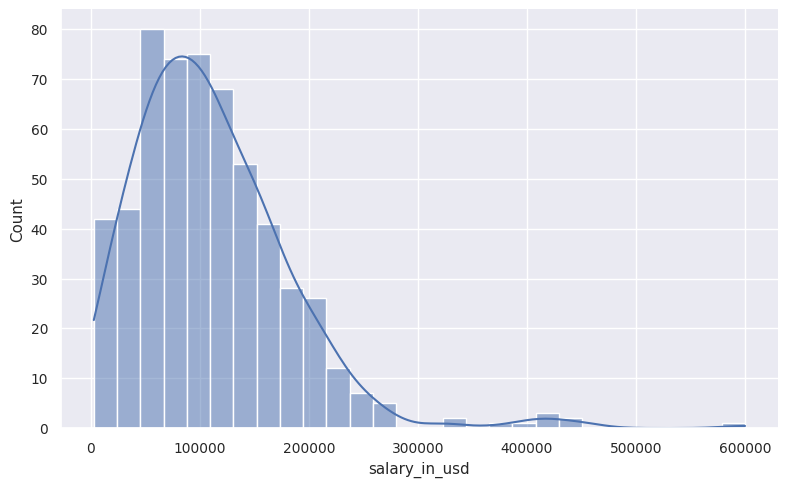

In [22]:
sns.displot(data=df_cleaned1, x="salary_in_usd", kde=True, aspect=8/5)

Conclusion:

---



*   The data of salary is right skewed.
*    Maximum values ranges between 0 to 200000 USD, while there are some extreme values also.
---

<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>Bivariate<a class="anchor" id="2.3"></a></b>
    </p>
</div></h3>

<h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>Comparing the Features with Salary<a class="anchor" id="2.3.1"></a></b></p></h4>
    
---
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>1. Job title and Salary<a class="anchor" id="2.3.1.1"></a></b></p></h5>

* <b>Plots</b>

---

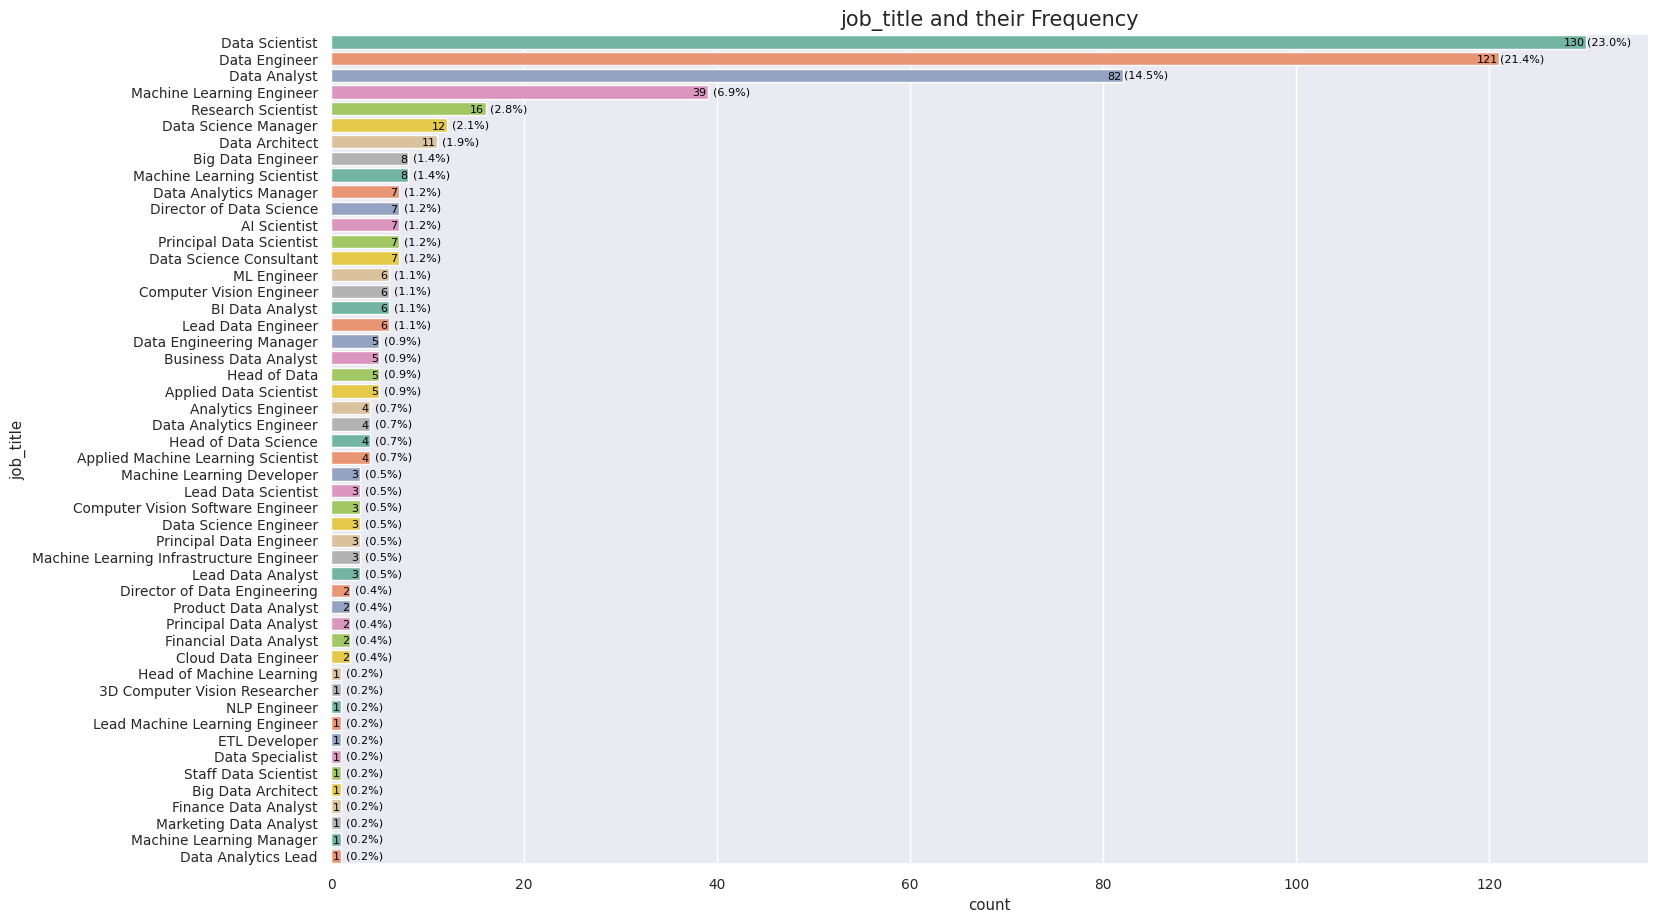

In [23]:
freq_plot(1,"job_title")

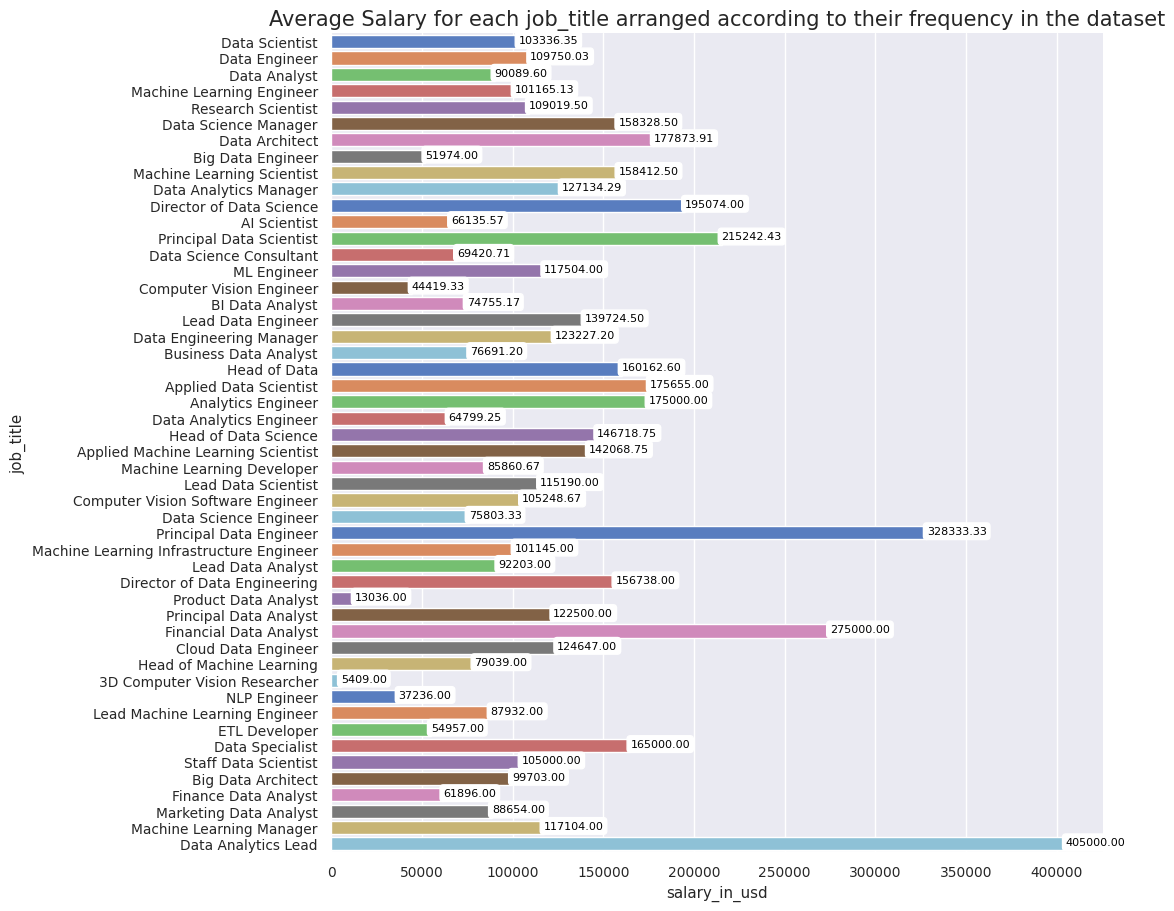

In [24]:
ASF_plot(1,"job_title")

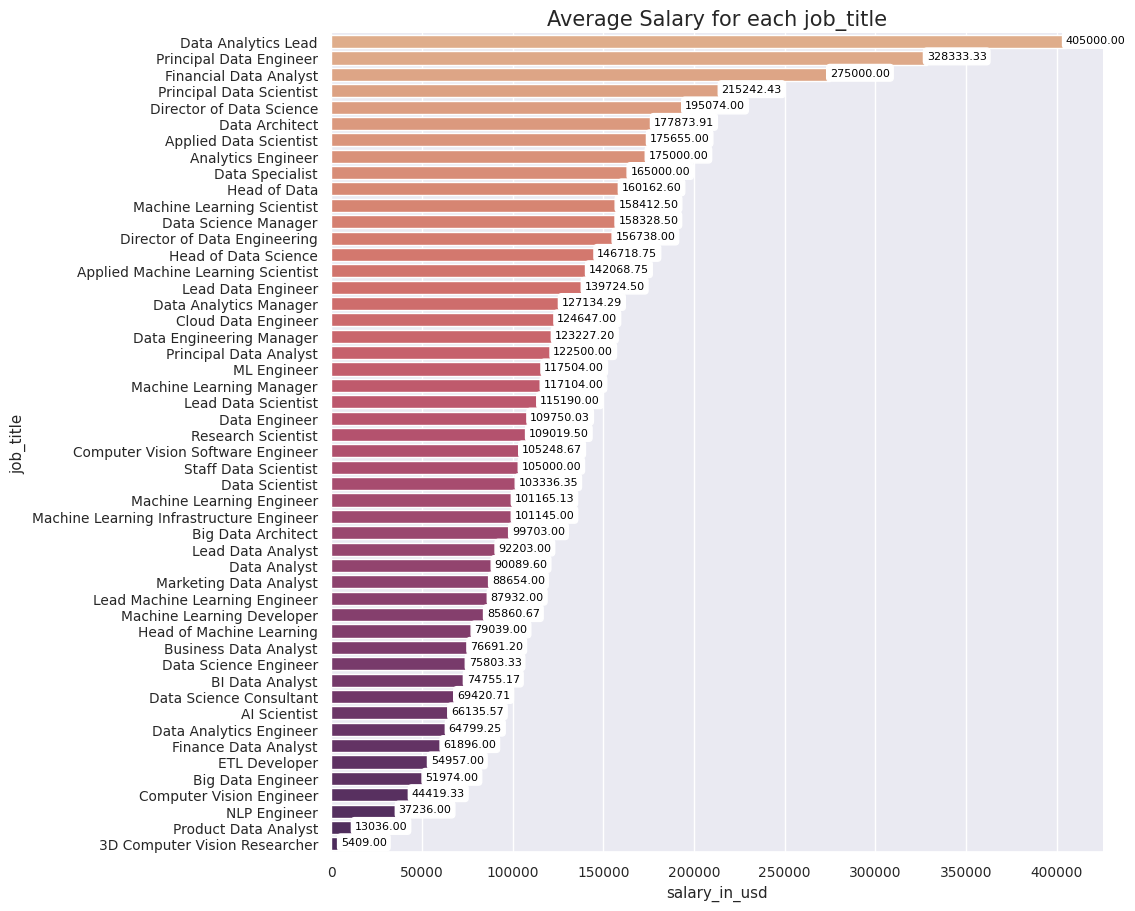

In [25]:
ASF_plot(1,"job_title",order=1)

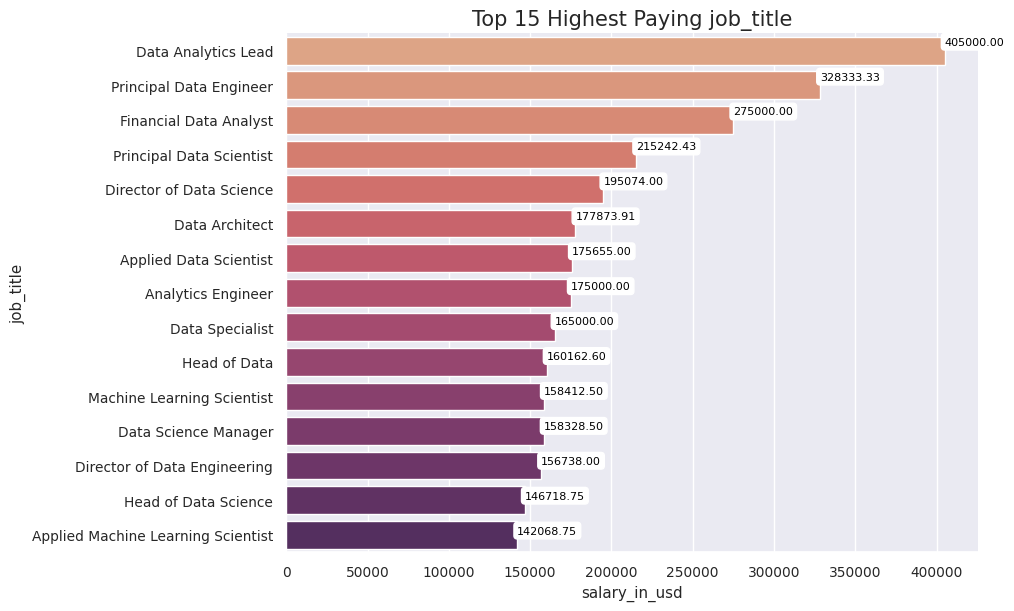

In [26]:
ASF_plot(1,"job_title",order=1,Top=15)

* <b>Conclusion:</b>



---
*   The graph shows that the highest frequency of a job title is of Data Scientist followed by Data Engineer, Data Analyst, Machine learning Engineer and Research Scientist.
*    The job titles having highest frequency in the dataset however,does not have the highest salaries. The one having the highest salary has the lowest frequency in the dataset. 
*    The jobs in data science, receiving highest salary is of Data analytics lead, followed by, Principle data engineer, Financial data analyst, Principal data scientist and Director of Data science.
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>2. Employee residence and Salary<a class="anchor" id="2.3.1.2"></a></b></p></h5>

* <b>Plots</b>

---

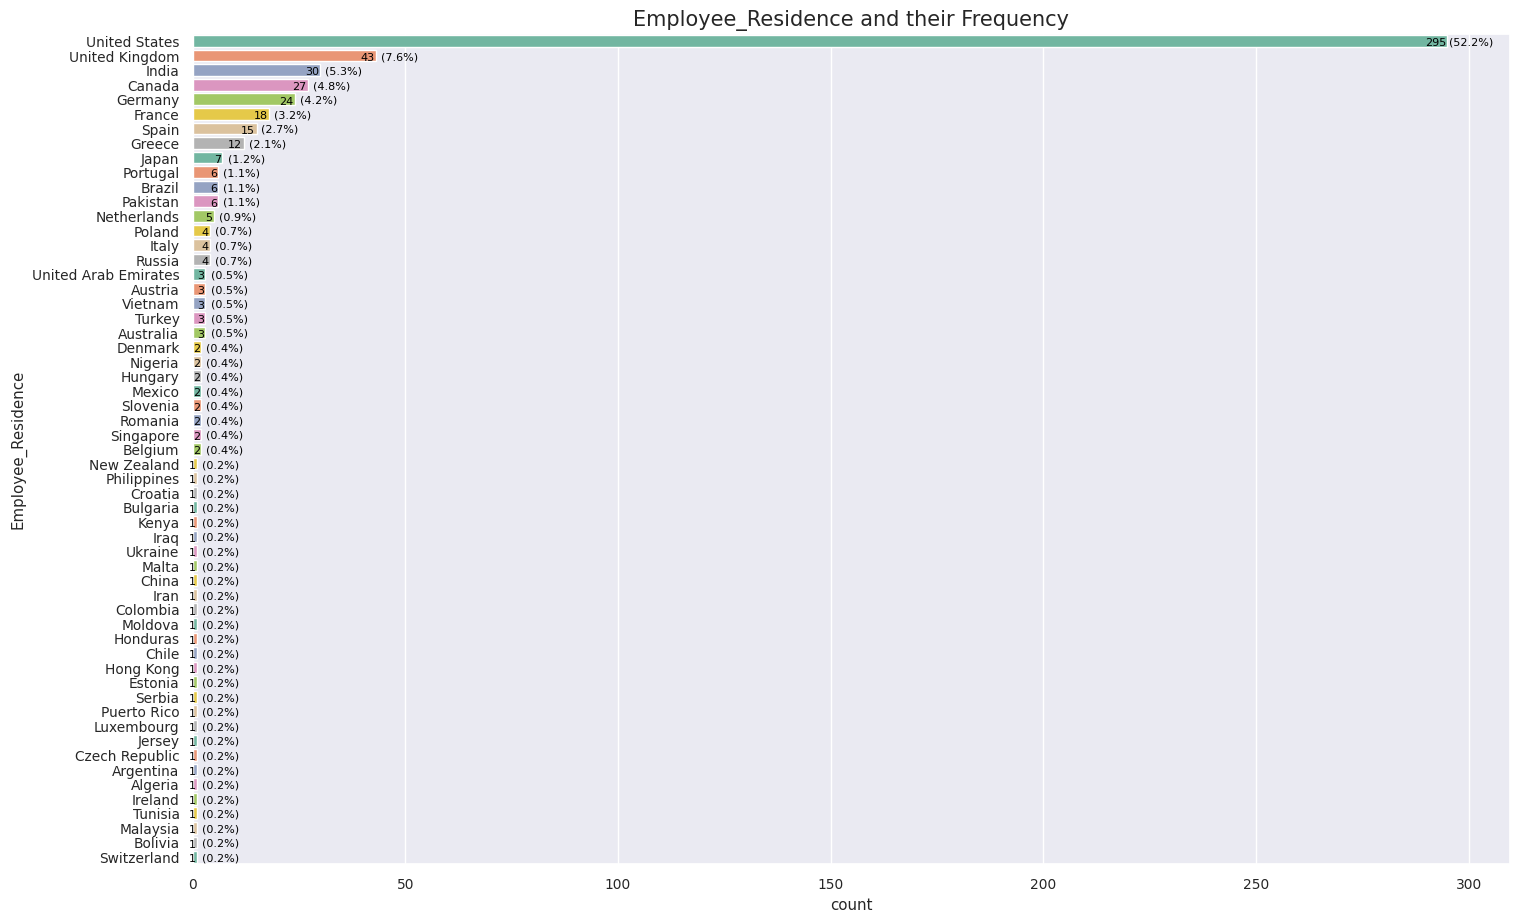

In [27]:
freq_plot(1,"Employee_Residence")

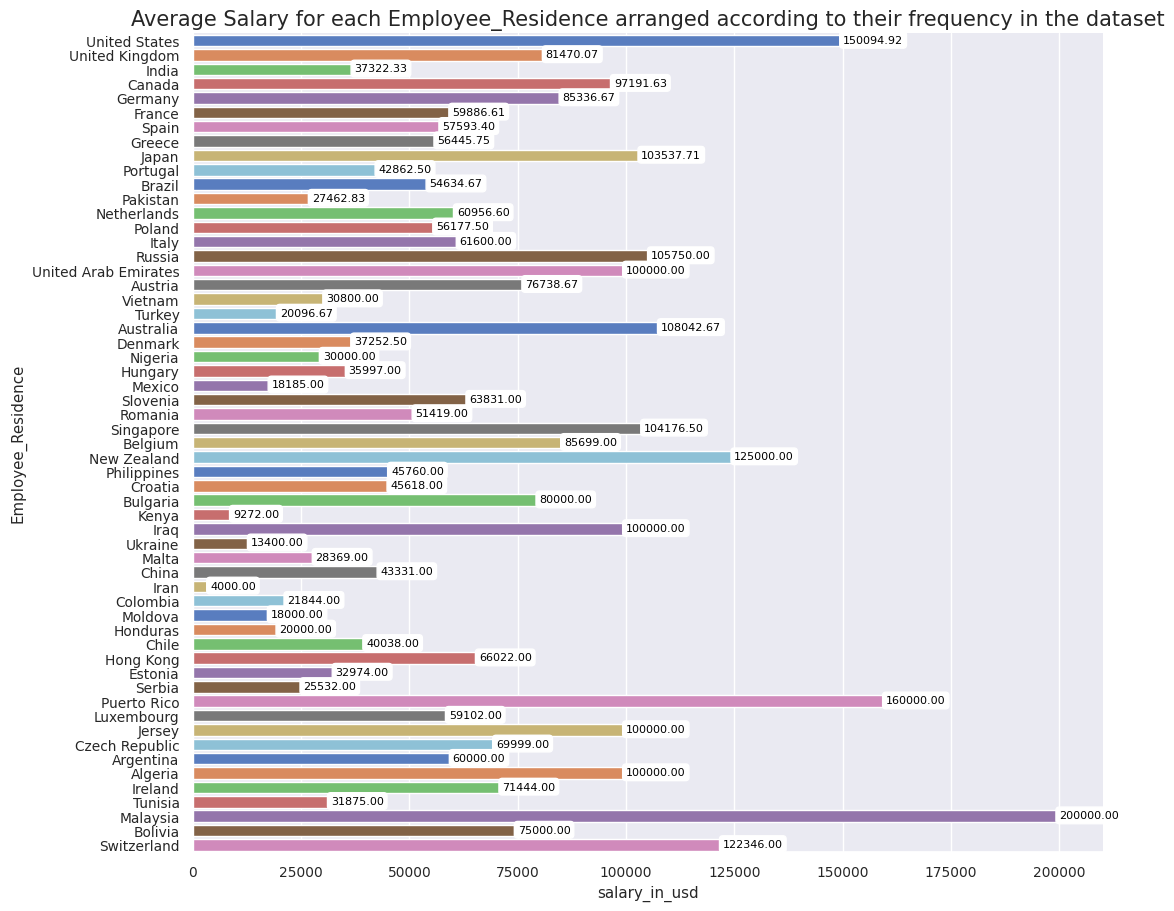

In [28]:
ASF_plot(1,"Employee_Residence")

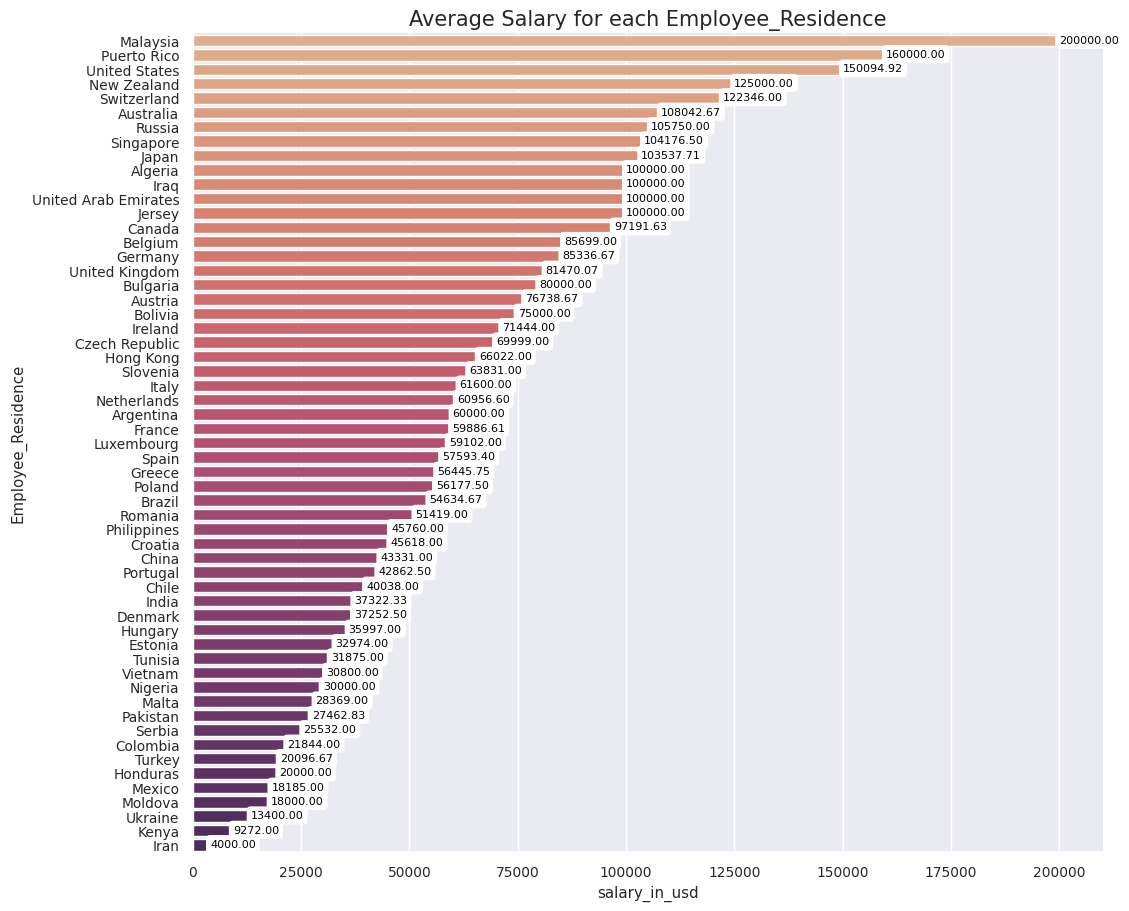

In [29]:
ASF_plot(1,"Employee_Residence",order=1)

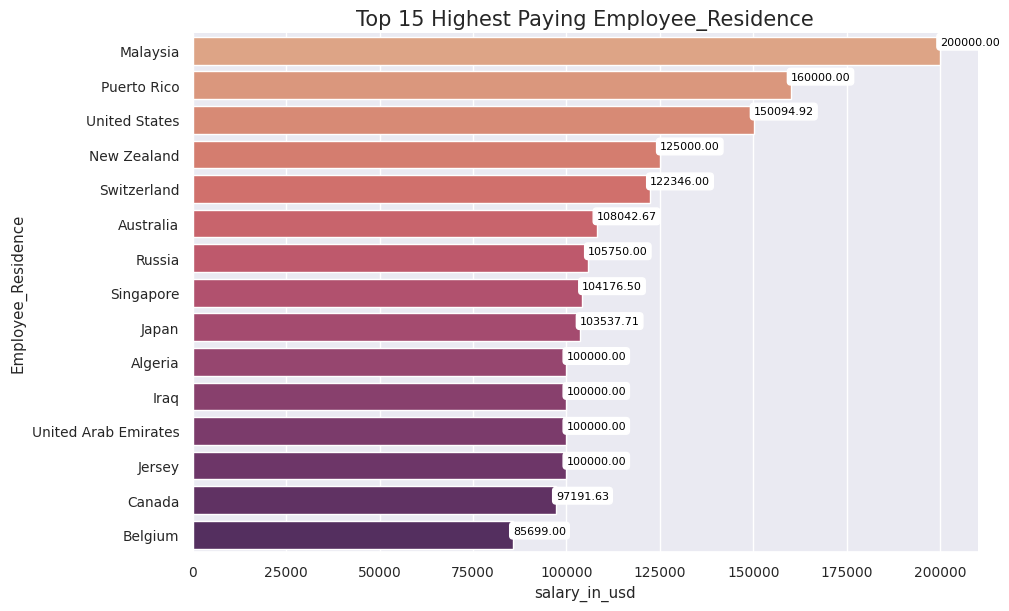

In [30]:
ASF_plot(1,"Employee_Residence",order=1,Top=15)

* <b>Conclusion</b>

---
*   The maximum Data scientist jobs are in the United States, followed by United Kingdom, India, Canada and Germany.
*   Based on this dataset, Malaysia and Puerto Rico are the countries where average salary for data scientist jobs are the highest. But looking at the frequency of both the countries, we highlighted that there are very few entries (only 1) for these countries. Hence it won't be advisible to make any inferences based on only one entries.
*   If we ignore these two entries, then United States, becomes the highest salary paying country to the data science jobs. 
*   But looking at the frequency of all the employee residence, we can say that the data is highly biased, because more than half of the entries are from United States. 
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>3. Company Size and Salary<a class="anchor" id="2.3.1.3"></a></b></p></h5>

* <b>Plots</b>

---

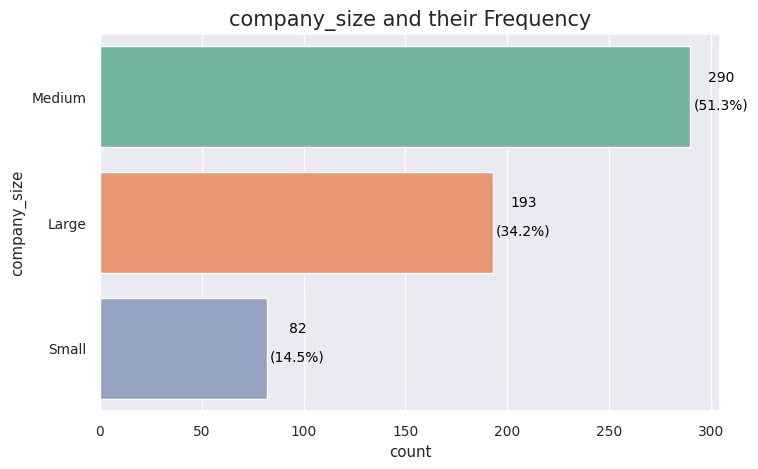

In [31]:
freq_plot(2,"company_size")

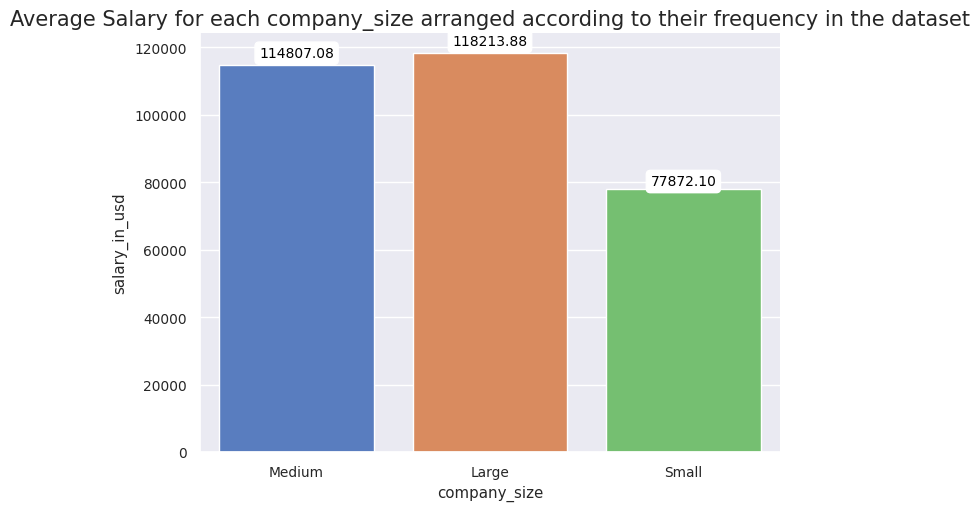

In [32]:
ASF_plot(2,"company_size")

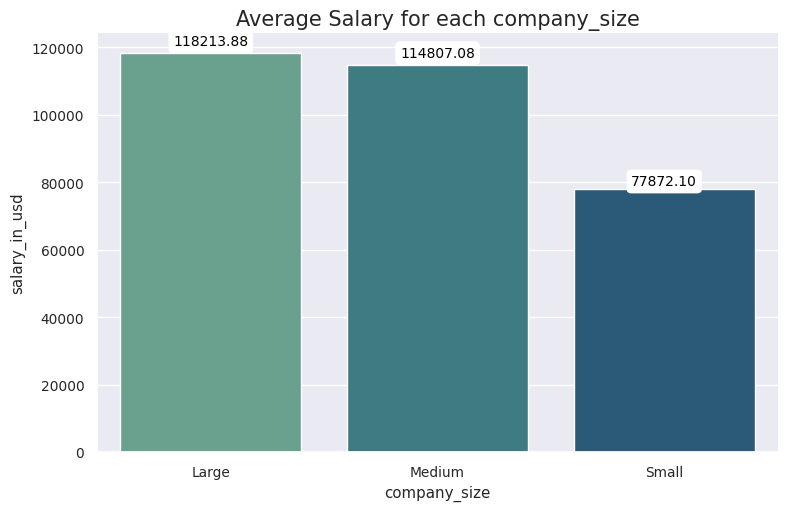

In [33]:
ASF_plot(2,"company_size",order=1)

* <b>Conclusion</b>


---
*   The highest frequency is of medium size companies.
*   However, the average salary of large sized companies are highest followed by medium sized and small sized companies.
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>4. Company loacation and Salary<a class="anchor" id="2.3.1.4"></a></b></p></h5>

* <b>Plots<b>
    
---

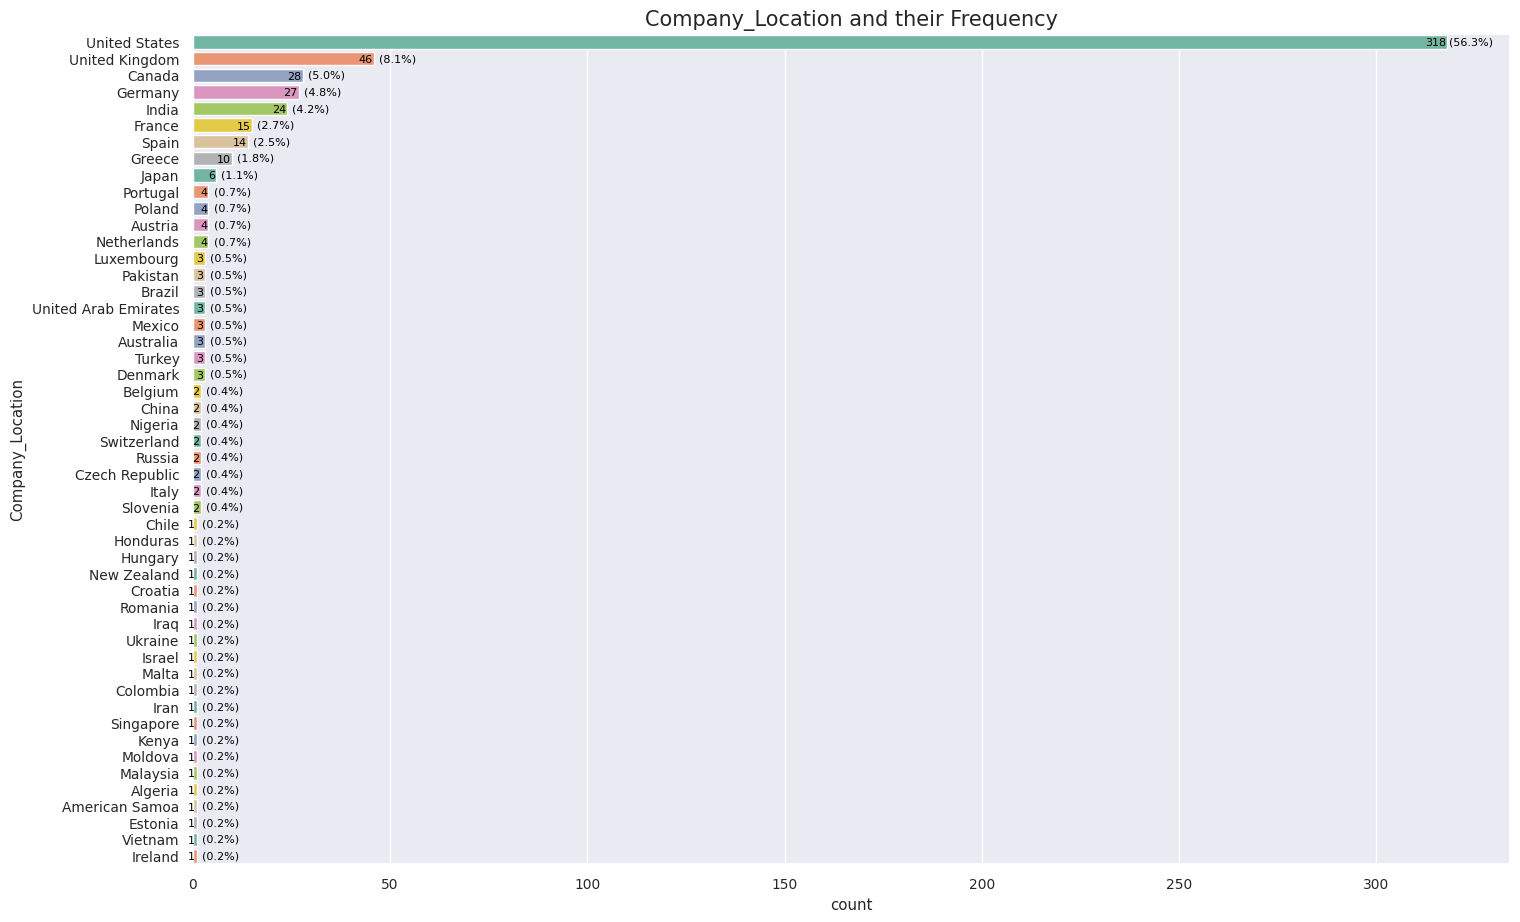

In [34]:
freq_plot(1,"Company_Location")

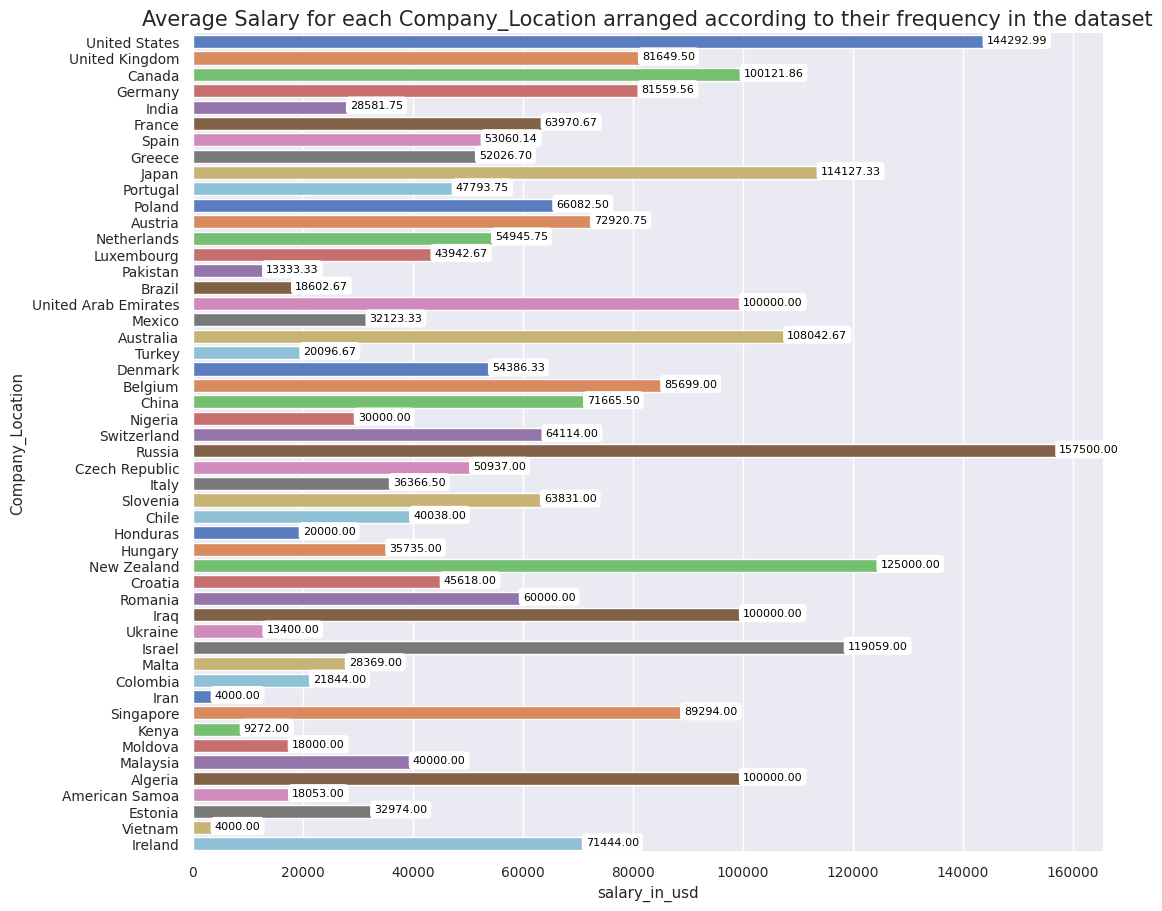

In [35]:
ASF_plot(1,"Company_Location")

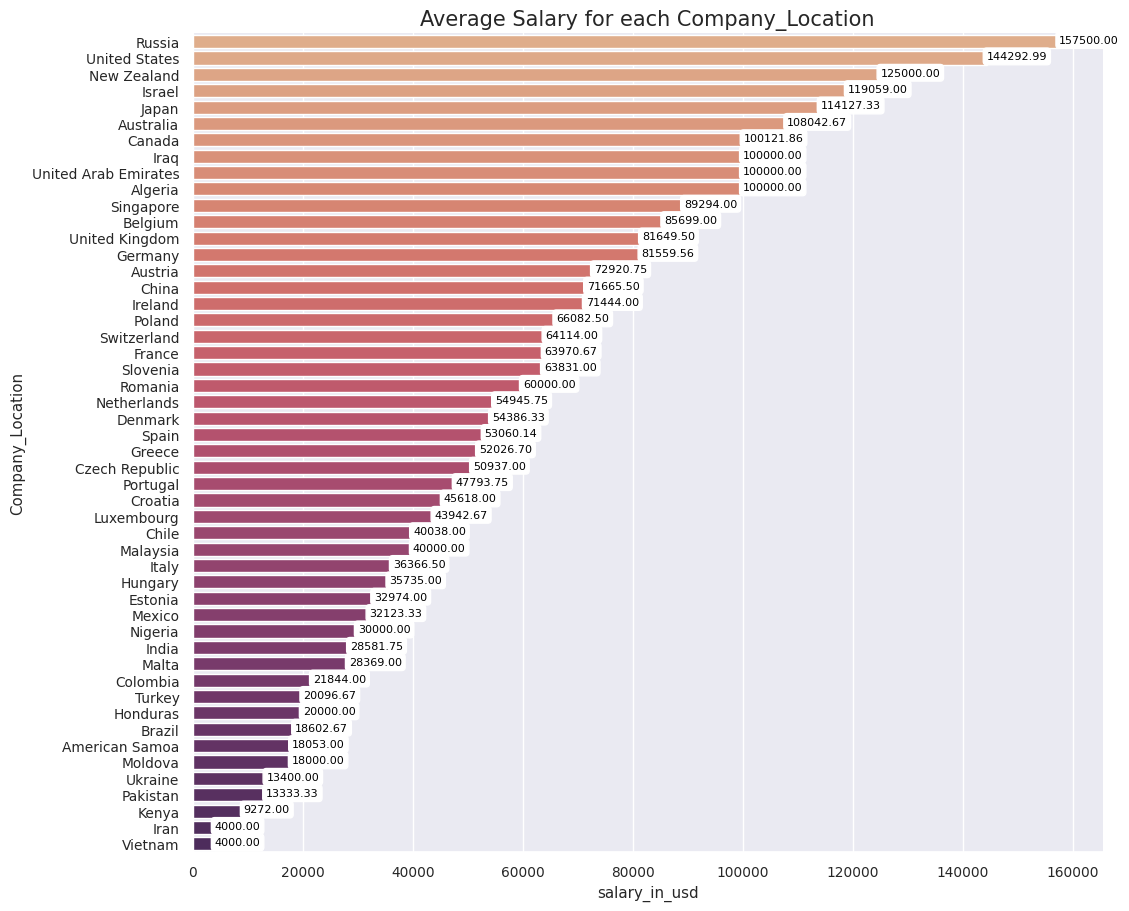

In [36]:
ASF_plot(1,"Company_Location",order=1)

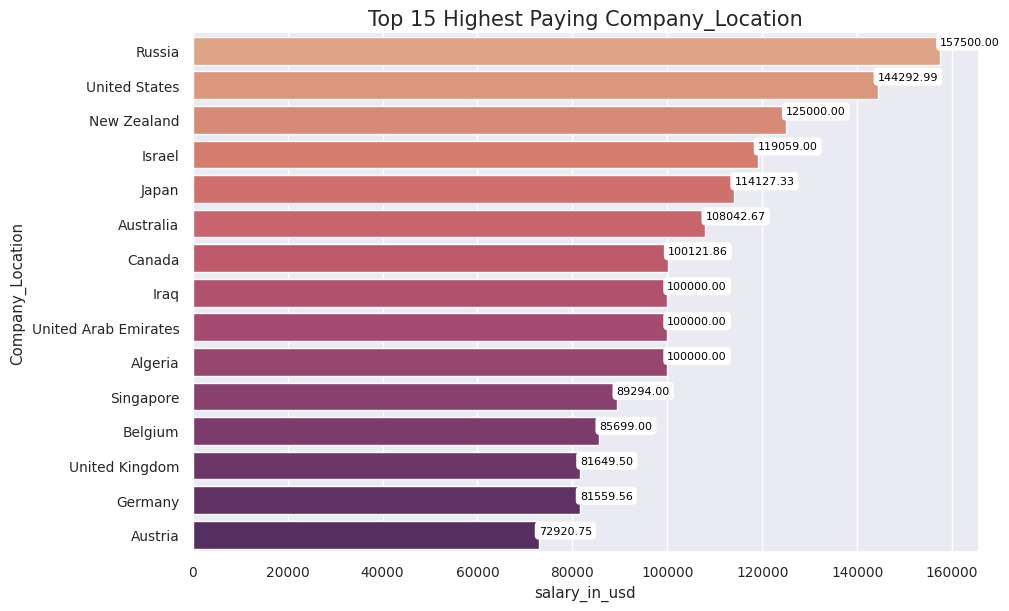

In [37]:
ASF_plot(1,"Company_Location",order=1,Top=15)

* <b>Conclusion:</b>

---
*   Maximum companies that provides data scientist jobs are located in United States, followed by United Kingdom, Canada, Germany and India.
*    However, the companies that provides highest salary are located in Russia.
*    But looking at the frequency, we have very few entries where the company location is Russia. Hence, it won't be advisible to rely on the conclusion.
*    After Russia, United States ranks second, in terms of the company locations providing high salaries. Also, the data is highly biased, because more than half of the entries have company locations in United States.
---


<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>5. Experience level and salary<a class="anchor" id="2.3.1.5"></a></b></p></h5>

* <b>Plots</b>

---

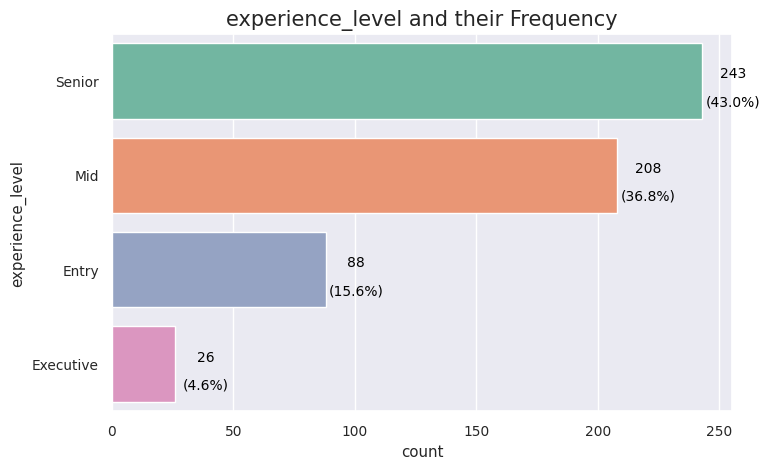

In [38]:
freq_plot(2,"experience_level")

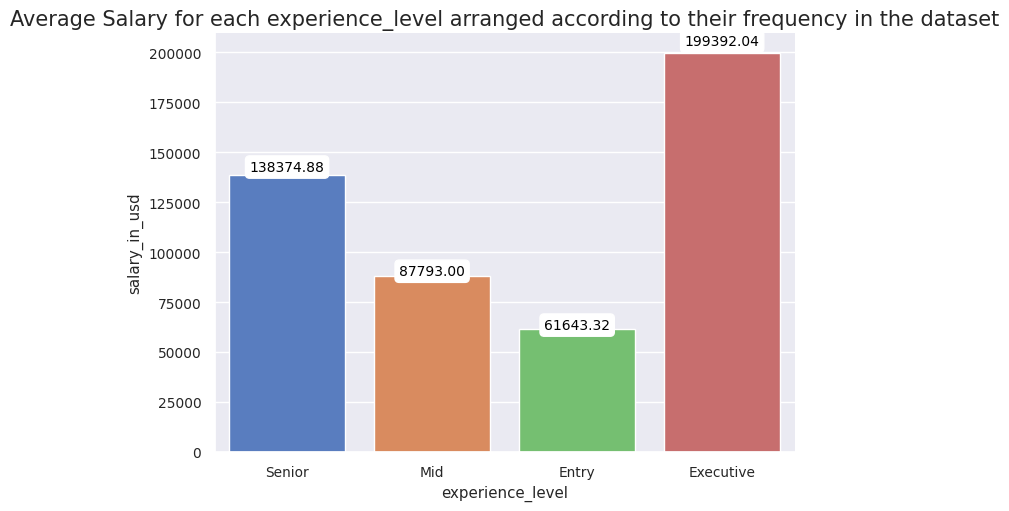

In [39]:
ASF_plot(2,"experience_level")

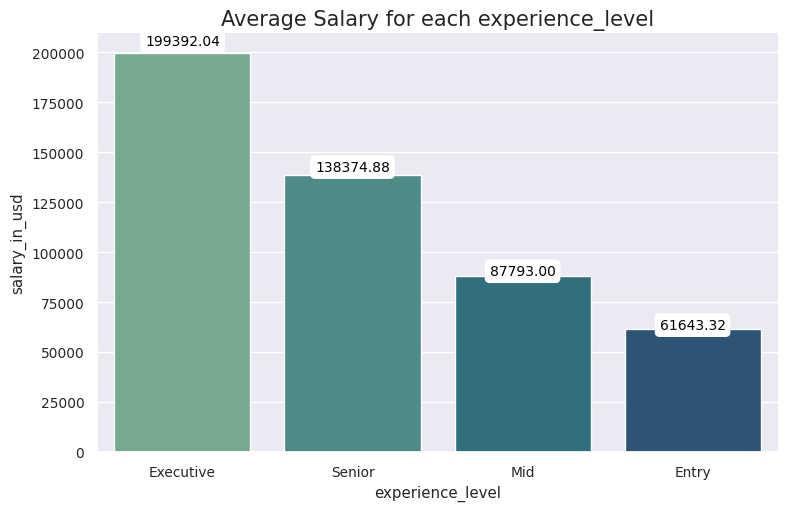

In [40]:
ASF_plot(2,"experience_level",order=1)

* <b>Conclusion</b>

---
*   The maximum entries are of the employees, working at Senior level followed by Middle level, Entry level and Executive.
*    However, for obvious reasons the salary of the employees, who are working at Executive level is the highest, followed by that of Senior, Middle and Entry level employees.
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>6. Employment Type and Salary<a class="anchor" id="2.3.1.6"></a></b></p></h5>

* <b>Plots</b>

---

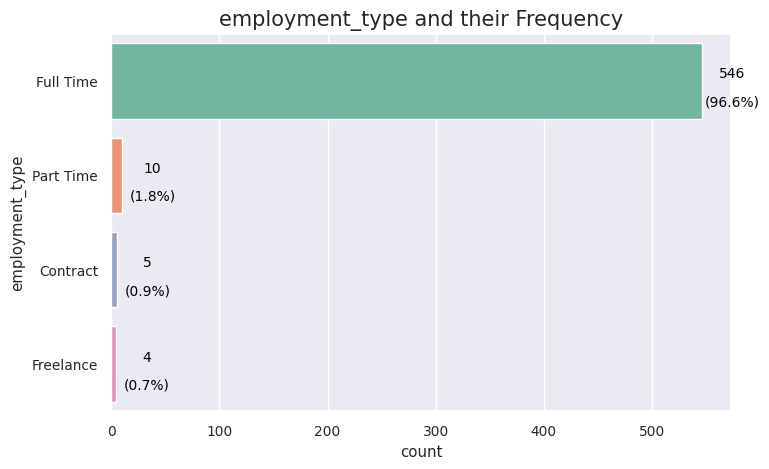

In [41]:
freq_plot(2,"employment_type")

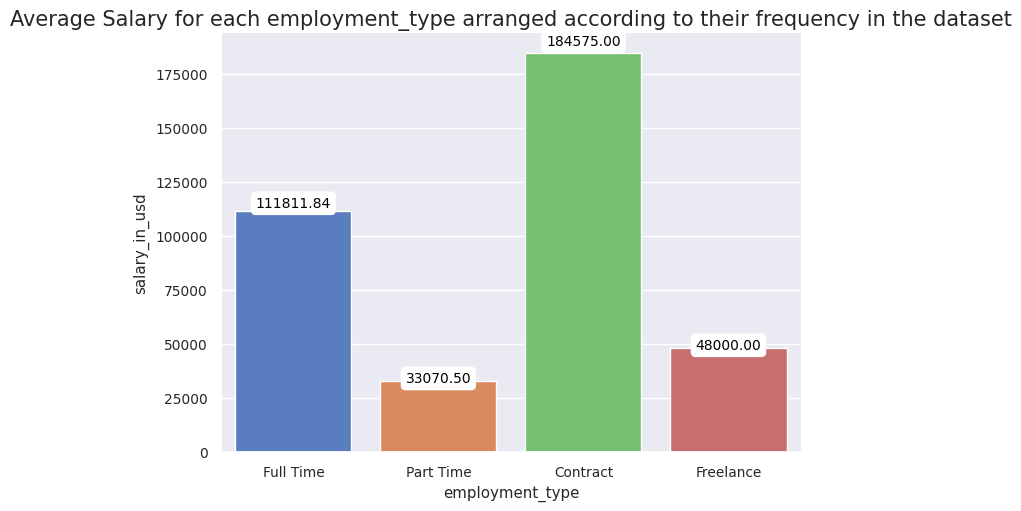

In [42]:
ASF_plot(2,"employment_type")

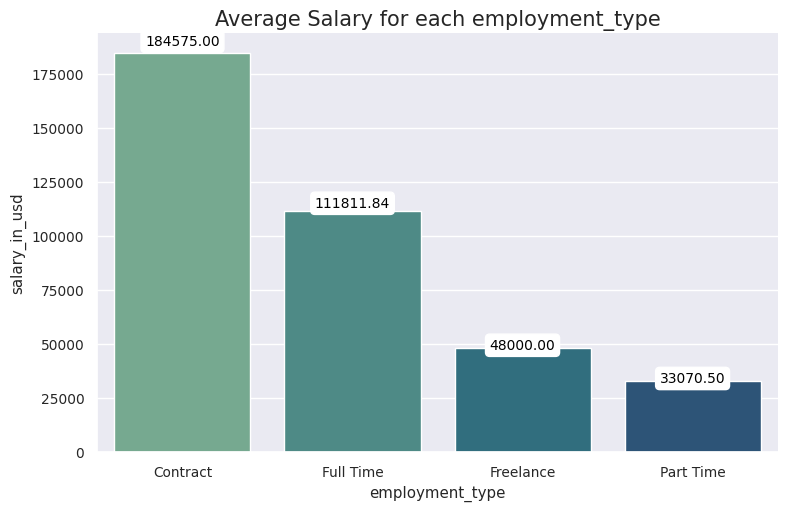

In [43]:
ASF_plot(2,"employment_type",order=1)

* <b>Conclusion</b>

---
*   In the dataset, the highest entries are of the employees working on full time basis, whereas those working as part time, contract and freelance have very few entries.
*   However, the salary of those working on contractual basis is highest followed by those working on full time, freelance and part time basis.
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>7. Remote ratio and Salary<a class="anchor" id="2.3.1.7"></a></b></p></h5>

* <b>Plots</b>

---

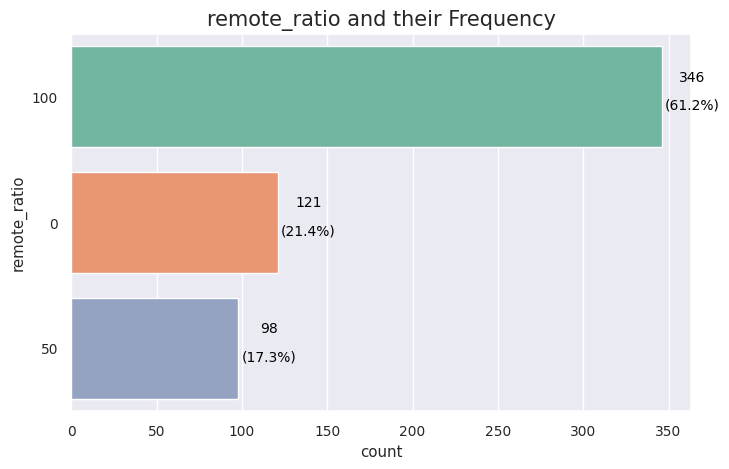

In [44]:
freq_plot(2,"remote_ratio")

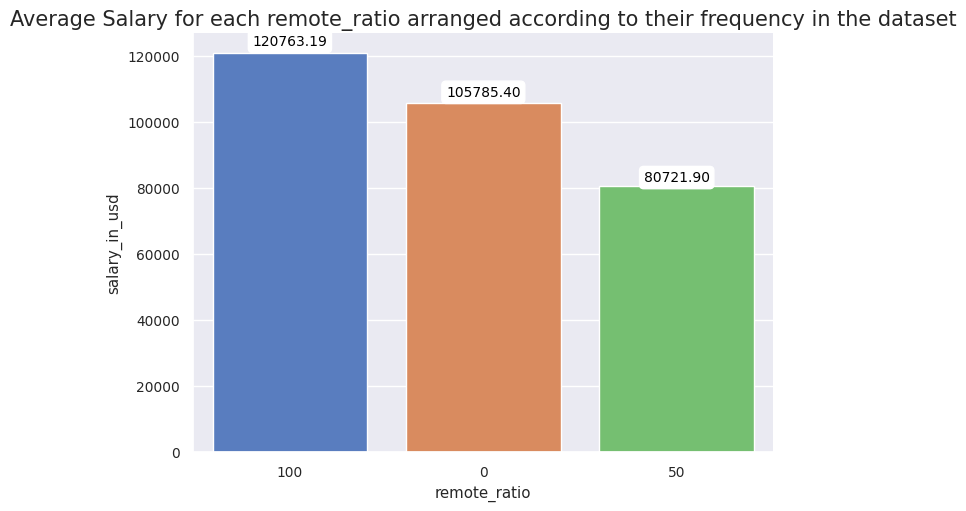

In [45]:
ASF_plot(2,"remote_ratio")

* <b>Conclusion:</b>

---
*   The highest frequency in the data set is of the employees who are working 100% remotely, followed by that of working fully onsite, followed by the ones working on hybrid basis.
*   Looking from the salary point of view also, the employees who are working 100% remotely are earning the highest followed by those working fully onsite, followed by those working on hybrid basis.
---

* <h4><p style="color:#5B2C6F;font-family:Courier New;font-size:20px;"><b>Categorical Comparisons<a class="anchor" id="2.3.2"></a></b></p></h4>

---
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>1. Employment Type and Remote Ratio<a class="anchor" id="2.3.2.1"></a></b></p></h5>

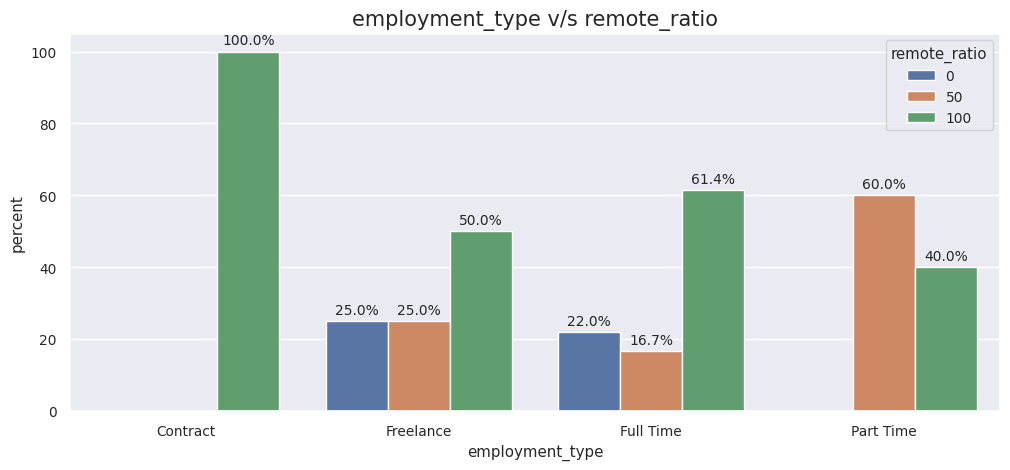

In [46]:
categ_plot("employment_type","remote_ratio")

<b>Conclusion:</b>

---



*   The dataset shows that all the employees who are employed on contractual basis are working 100% remotely.
*   The ratio of the employees who are working 100% remotely is highest for all the categories, except for those working on part time basis.
---



<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>2. Employment Type and Experience Level<a class="anchor" id="2.3.2.2"></a></b></p></h5>

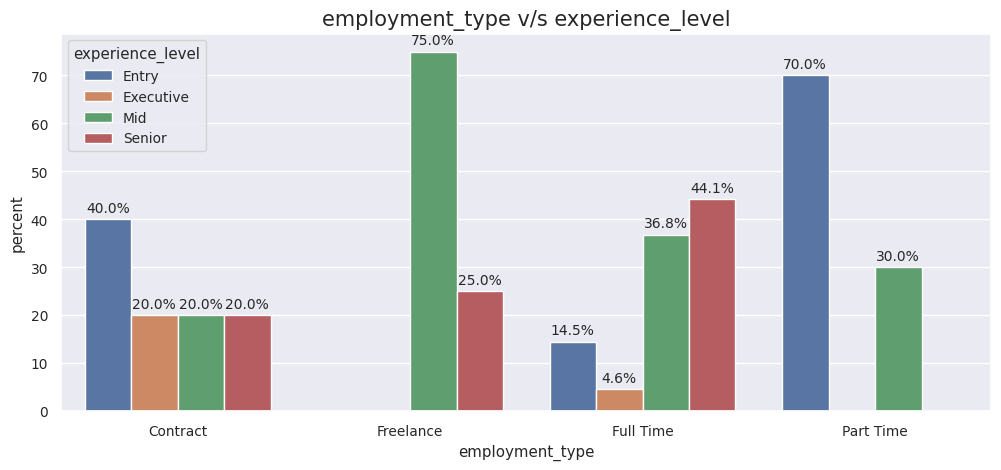

In [47]:
categ_plot("employment_type","experience_level")

<b>Conclusion:</b>

---

*   In this dataset, there are no entry level or executive level freelancers.
*   For, those working part time, majority of the employees are of entry level. Whereas for the freelancers, there is a dominance of employees having middle level of experirnce.
*   Among those working on full time basis, majority of the employees have a senior level of experience, followed by those having middle level, entry level and executive level of experience.
*   Overall, the ratio of employees having the executive level of experience is lower for all the categories.
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>3. Experience level and Remote ratio<a class="anchor" id="2.3.2.3"></a></b></p></h5>

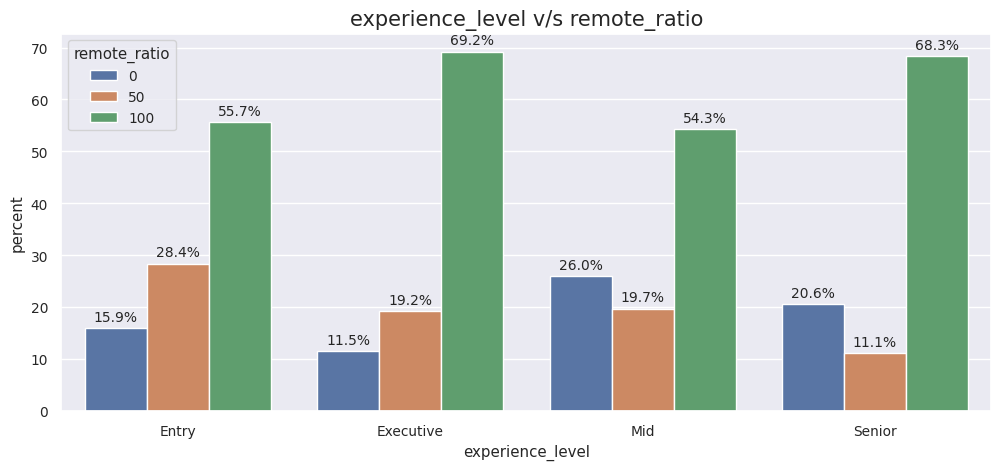

In [48]:
categ_plot("experience_level","remote_ratio")

<b>Conclusion:</b>

---
*   For all the categories of experience level, the ratio of the employees working 100% remotely is higher as compared to the other remote ratios.
*   For the employees having executive and entry level of experience, the ratio of employees working on hybrid basis is higher than that of those working completely on-site.
*   Whereas, for the employees having middle and senior level of experience, the ratio of employees working completely on-site is higher than those working on hybrid basis.
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>4. Experience Level and Company Size<a class="anchor" id="2.3.2.4"></a></b></p></h5>

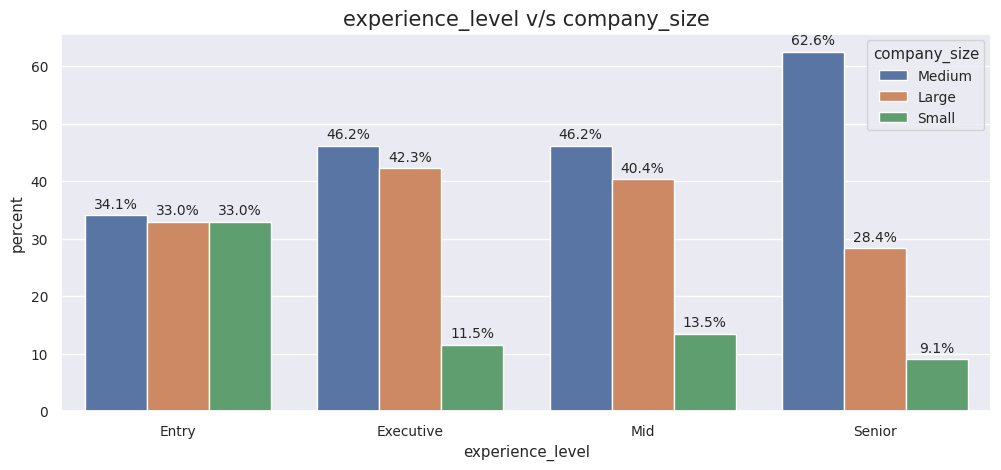

In [49]:
categ_plot("experience_level","company_size")

<b>Conclusion:</b>

---
*   For the entry level employees, the ratio of those working in large, medium and small companies are almost similar, whereas for the other companies, huge difference can be witnessed
*   However for all the categories, the ratio of employees working in medium sized companies is higher followed by those working in large and small sized companies.  
---


<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>5. Employment Type and Company Size<a class="anchor" id="2.3.2.5"></a></b></p></h5>

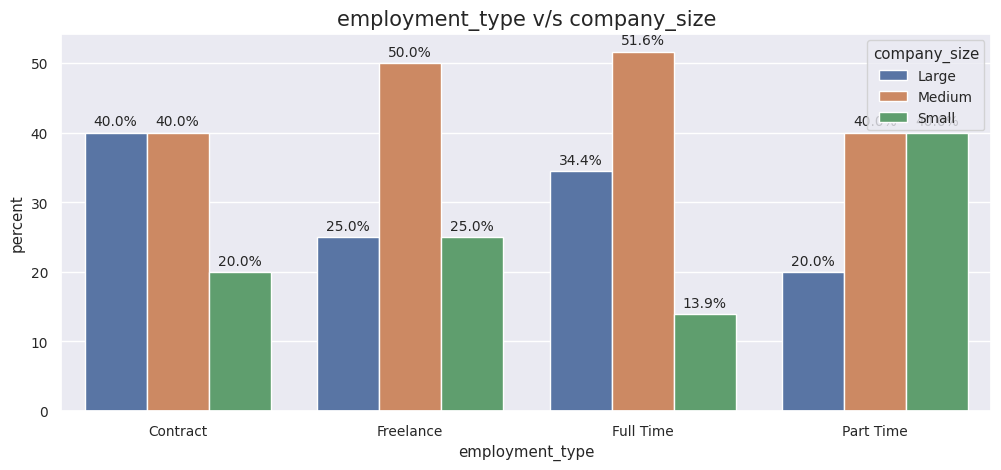

In [50]:
categ_plot("employment_type","company_size")

<b>Conclusion:</b>

---
*   Majority of the freelancers and full type employed employees, are working in medium sized companies. 
*   Whereas for the employees working on contractual basis, the ratio of those working in large and medium sized companies is equal and those working in small sized companies is the lowest.
*   On the other hand, for the employees working on part-time basis, the ratio of those working in small and medium sized companies is equal and those working in large sized companies is the lowest.
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>6. Remote Ratio and Company Size<a class="anchor" id="2.3.2.6"></a></b></p></h5>

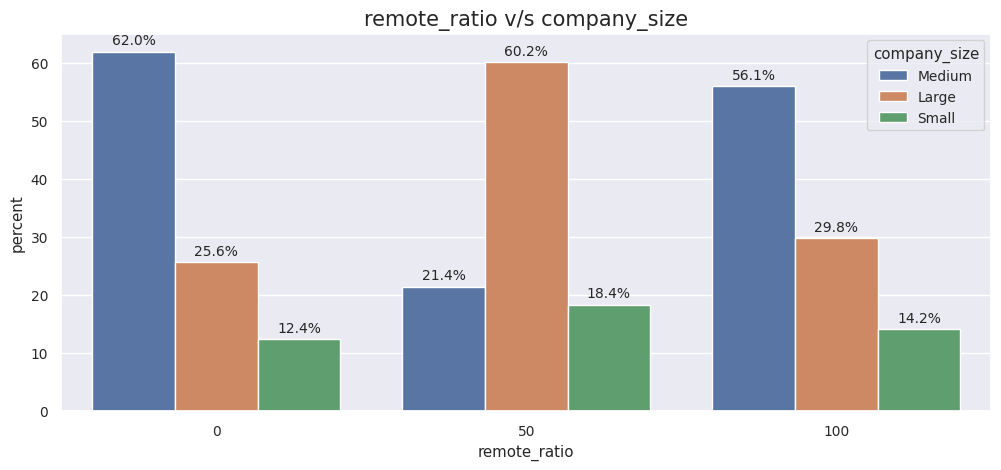

In [51]:
categ_plot("remote_ratio", "company_size")

<b>Conclusion:</b>

---



*   Among the employees who are working 100% remotely or completely on-site, majority are working in medium sized companies, followed by those working in large and small sized companies..
*   Whereas for those working on hybrid basis, majority are working in large sized companies, followed by those working in medium and small sized companies.
---


<h3><div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#E8DAEF;
           font-size:150%;
           font-family:Courier New;
           letter-spacing:0.5px">
<p style="padding: 5px;
              color:#5B2C6F;
               text-align:center">
    <b>Multivariate<a class="anchor" id="2.4"></a></b>
    </p>
</div></h3>

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>1. Salary v/s Experience level v/s Remote Ratio<a class="anchor" id="2.4.1"></a></b></p></h5>

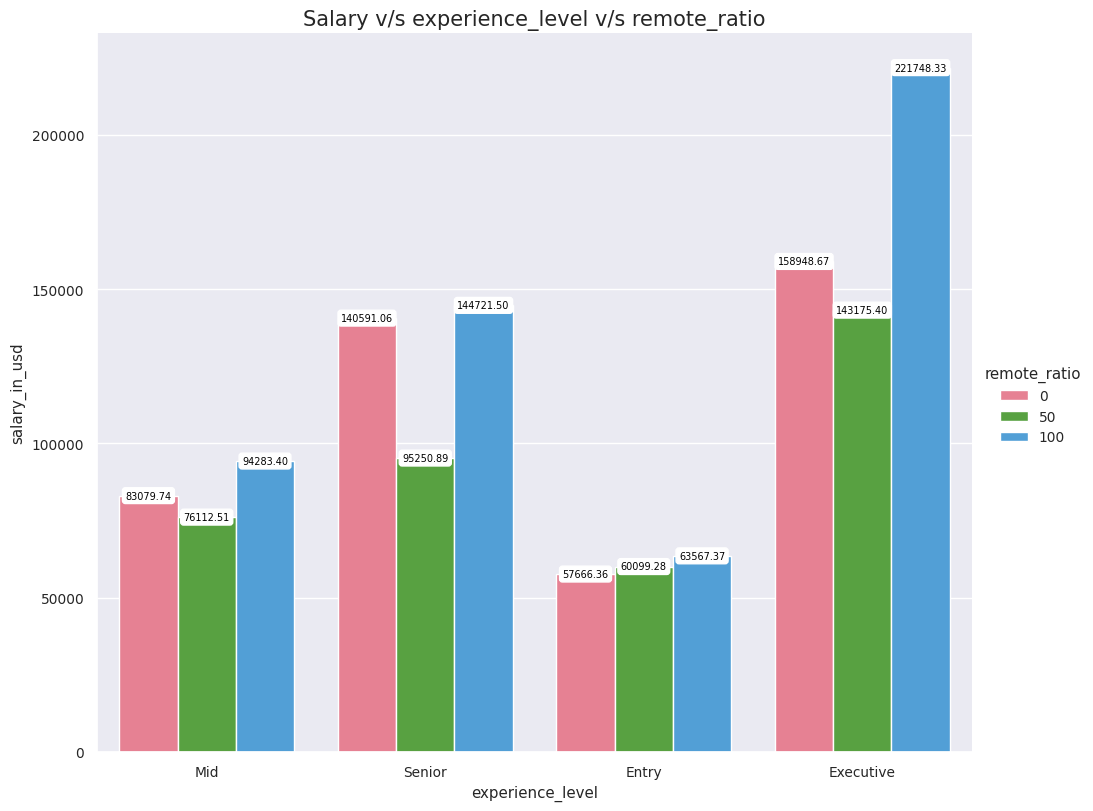

In [52]:
Multi_plot("experience_level","remote_ratio")

#### Conclusion :

---



*   The salary of the employees working at executive level is the highest, and among them, the ones working 100% remotely earns the highest.
*   Seeing the plots, it is very clear that for all the experience levels, the ones working 100% remotely, earns higher salaries as compared to the ones working on-site or on hybrid basis.
---




<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>2. Salary v/s Job title v/s Remote Ratio<a class="anchor" id="2.4.2"></a></b></p></h5>

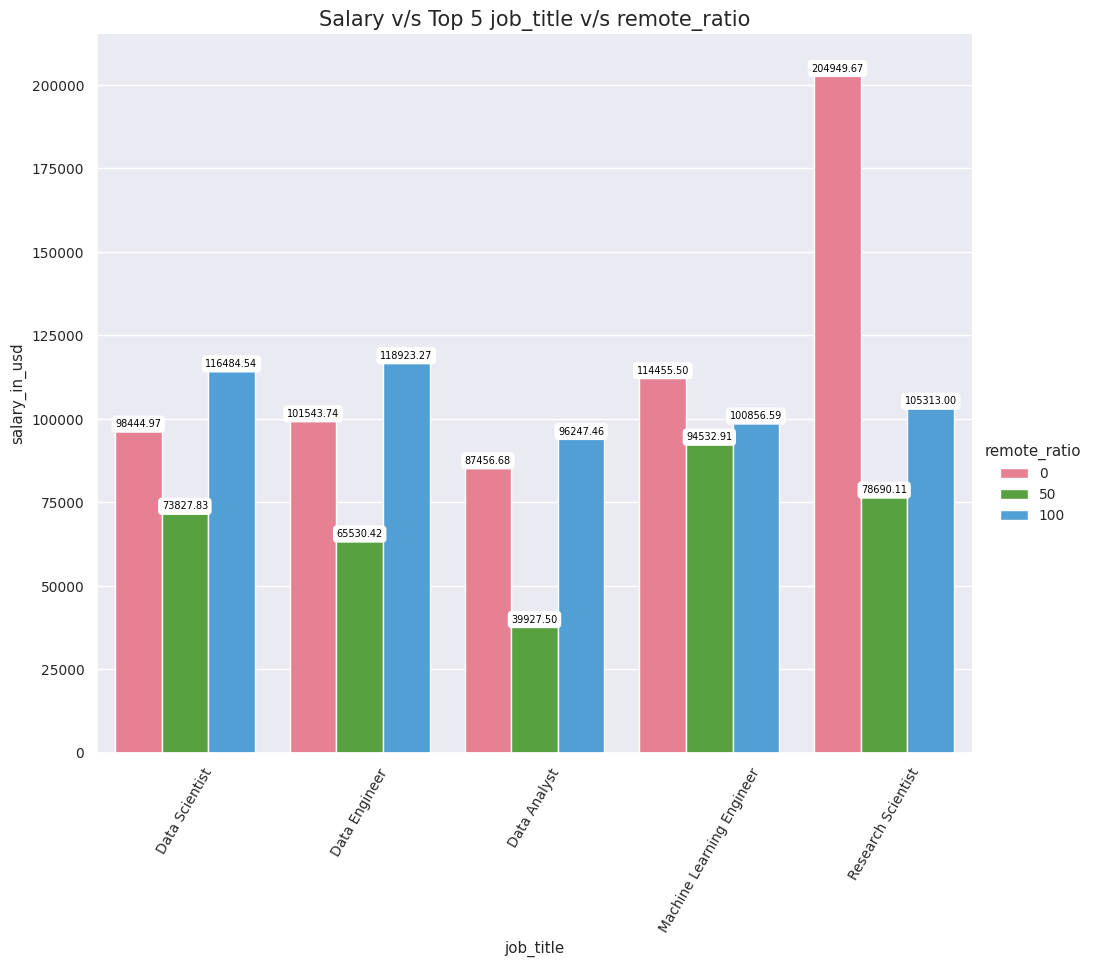

In [53]:
Multi_plot("job_title","remote_ratio",type=1)

#### Conclusion:

---
*   This graph compares the salaries of job titles that are among the top 5 in terms of their frequency (Here, the Top 5 are Data Scientist, Data Engineer Data Analyst, Machine Learning Engineer and Research Scientist)
*   The data says that, for the employees working as Data Scientist, Data Engineer and Data analyst, the ones working 100% remotely are earning higher as compared to the ones working on-site and on hybrid basis.
*   Whereas, for the employees, working as Machine Learning Engineer and Research Scientist, the ones working completely on-site are earning higher than those working 100% remotely and on hybrid basis.
*   For the given job titles, the ones working on hybrid basis are earning the lowest.
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>3. Salary v/s Job titles v/s Company Size<a class="anchor" id="2.4.3"></a></b></p></h5>

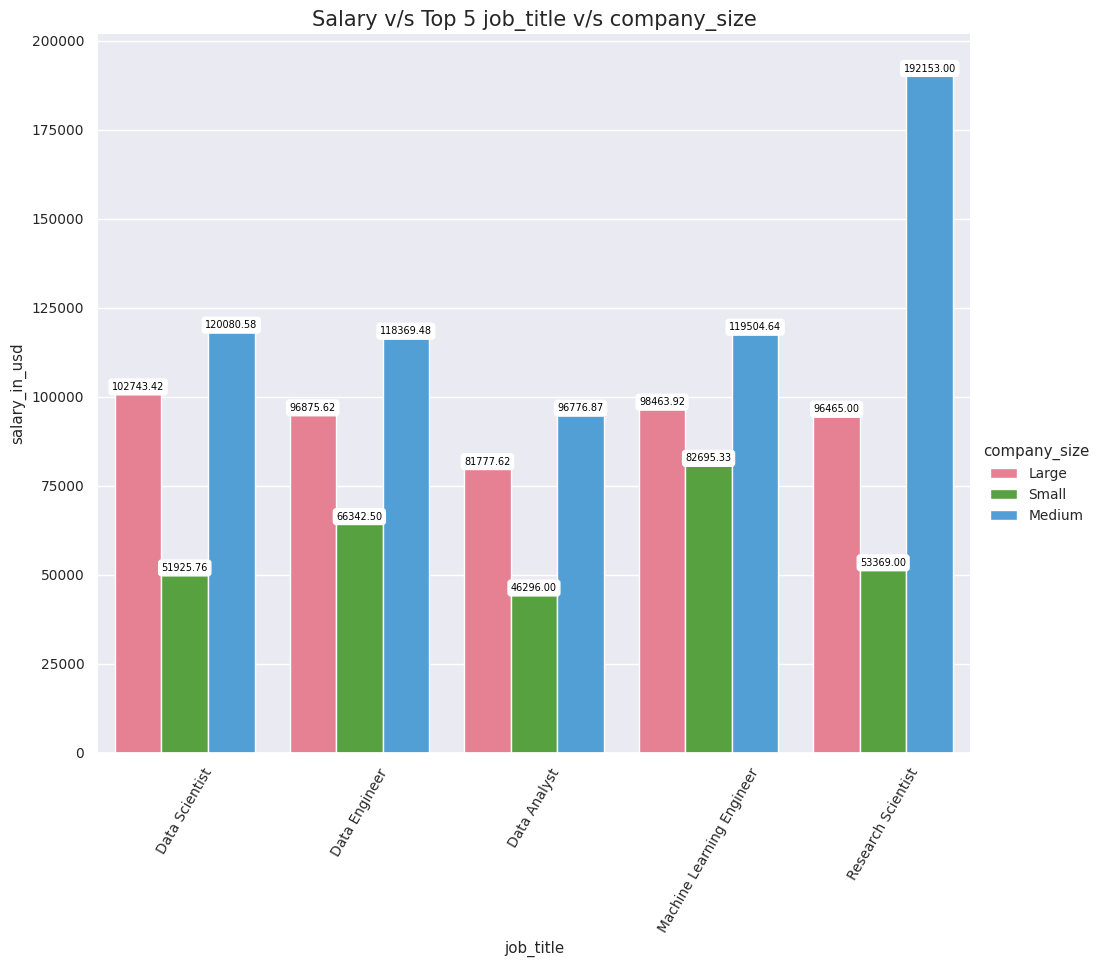

In [54]:
Multi_plot("job_title","company_size",type=1)

#### Conclusion:

---
*   This graph compares the salaries of job titles that are among the top 5 in terms of their frequency (Here, the Top 5 are Data Scientist, Data Engineer Data Analyst, Machine Learning Engineer and Research Scientist)
*   The data shows that, for the given job titles, the ones working in medium sized companies are earning the highest followed by the ones working in large sized companies, followed by those working in small sized companies.
---

<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>4. Salary v/s Job title v/s Experience Level<a class="anchor" id="2.4.4"></a></b></p></h5>

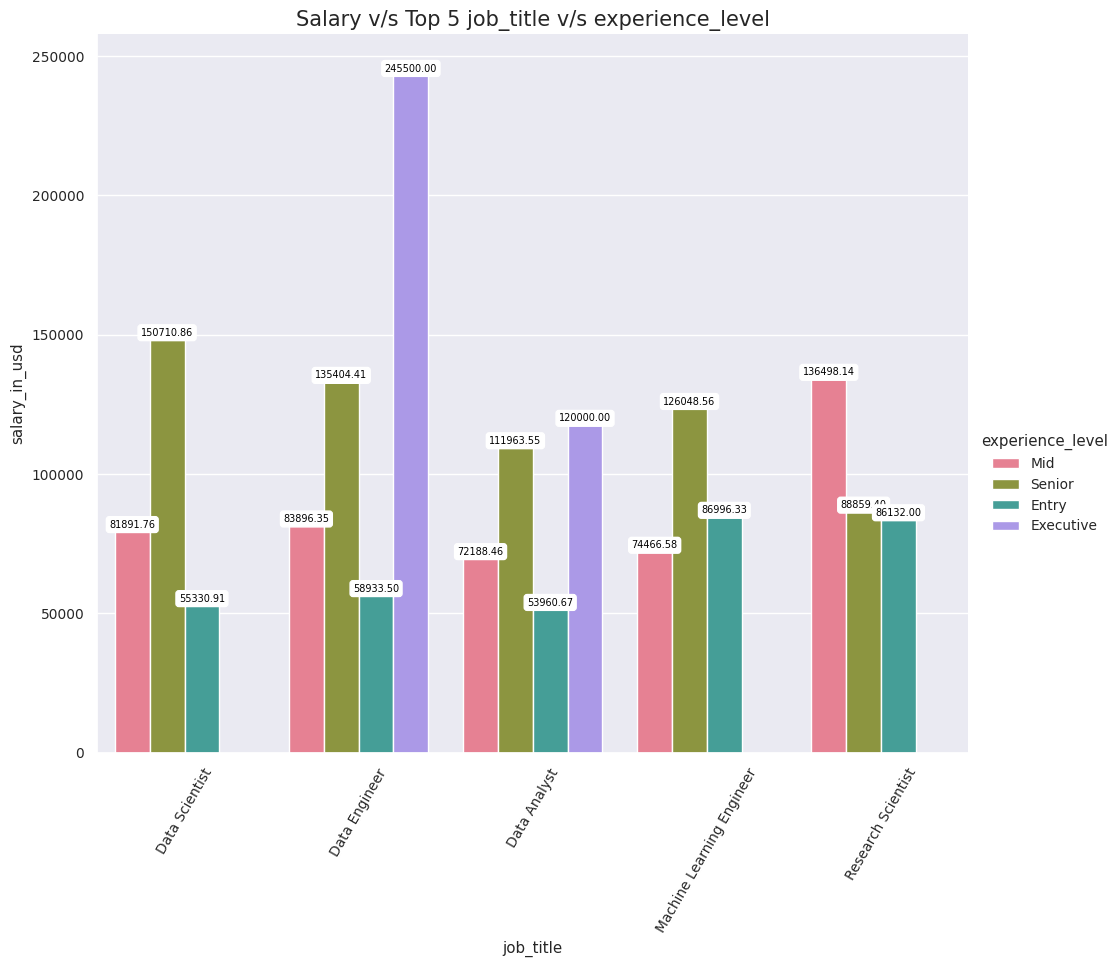

In [55]:
Multi_plot("job_title","experience_level",type=1)

#### Conclusion

---



*   This graph compares the salaries of job titles that are among the top 5 in terms of their frequency (Here, the Top 5 are Data Scientist, Data Engineer Data Analyst, Machine Learning Engineer and Research Scientist)
*   In this dataset, there are no employees working as Data Scientist, Machine Learning Engineer and Research Scientist and having an executive level of experience.
*   Comparing the salaries, for Data Engineer and Data Analyst, the ones having executive level of experience are earning the highest followed by the ones having senior, middle and entry level of experience.
*   For Data scientist, the ones having senior level of experience are earning highest followed by those having middle and entry level of experience.
*   A strange trend is witnessed for the Machine Learning Engineers and Research scientist, because, for the Machine Learning Engineers, the ones working on entry level are earning higher than those working on middle level.
*   Similarly, for the Research Scientist, the ones working on middle level are working higher than the ones working on senior level.
---






<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>5. Salary v/s Employment type v/s Experience Level<a class="anchor" id="2.4.5"></a></b></p></h5>

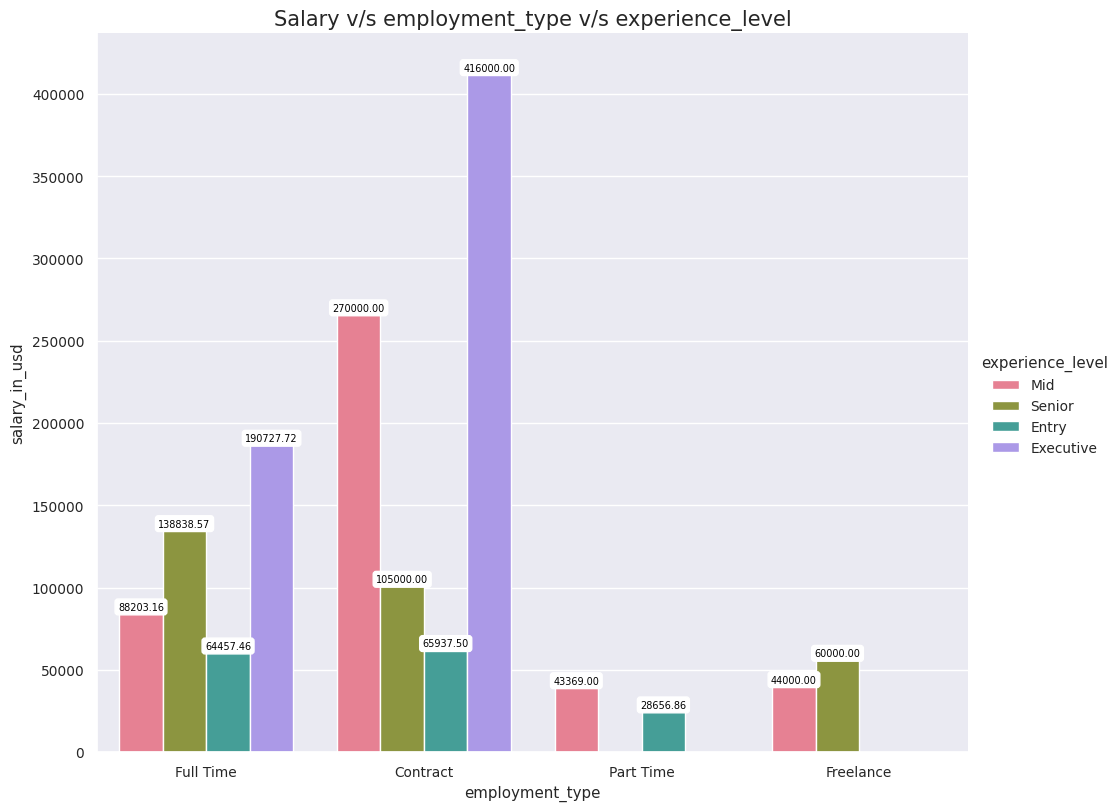

In [56]:
Multi_plot("employment_type","experience_level")

#### Conclusion:

---


*   The dataset says that the employees working on Full time and Contractual basis, the ones having executive level of experience are earning the highest.
*   However a strange trend is observed for the ones working on contractual basis, because, for the same, employees working at middle level are receiving higher salaries as compared to those working at senior level.
---



<h5><p style="color:#5B2C6F;font-family:Courier New;font-size:18px;"><b>6. Salary v/s Employment Type v/s Remote Ratio<a class="anchor" id="2.4.6"></a></b></p></h5>

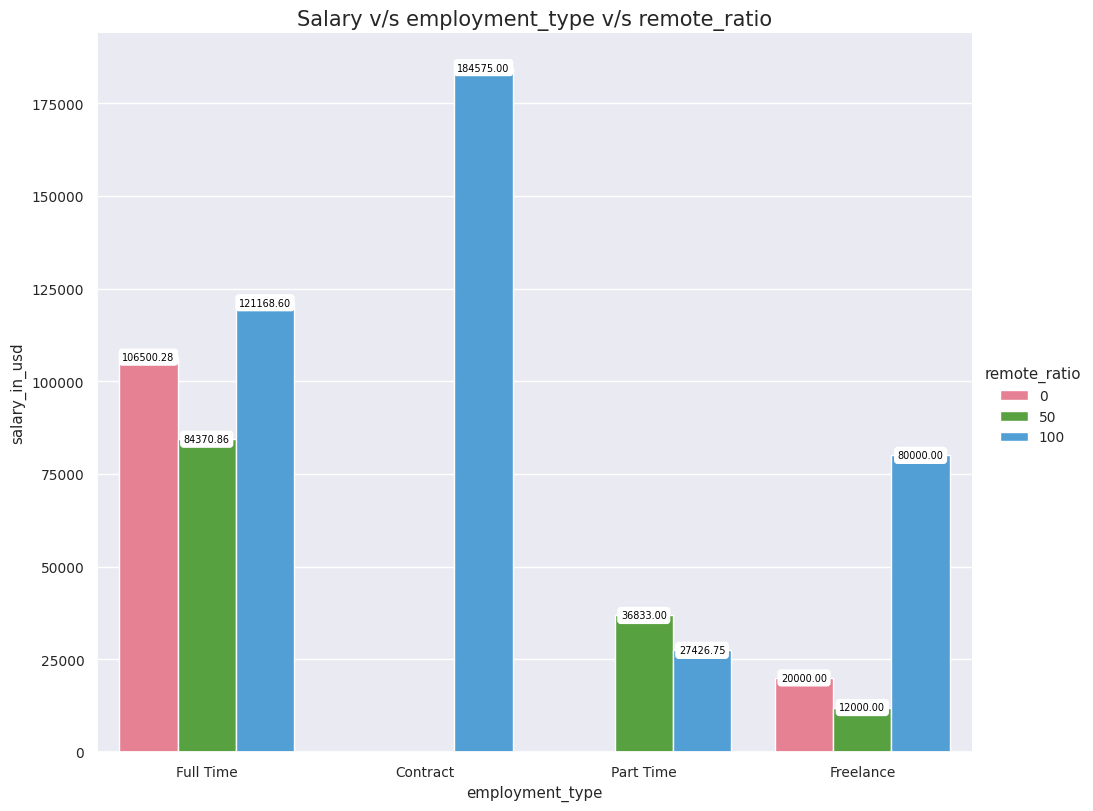

In [57]:
Multi_plot("employment_type","remote_ratio")

#### Conclusion:

---



*   The dataset shows that the employees having employment type as contract are all working 100% remotely and are also earning the highest as compared to other categories.
*   Next, among the employees working on full time basis the ones working 100% remotely are earning the highest followed by the ones working completely on-site and on hybrid basis.
---
